# Importing Packages

In [1433]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing Data

In [1434]:
# Import data from csv file
data = pd.read_csv("CaribbeanAllFinal.csv", low_memory=False)
data.head()

,ep1,econviol,emotvio,physvio,sexvio,sexphys,typevio,physcur,sexcur,emotcur,...,rQ701c,rQ701d,HighIncome,Island,Governance,HDI,LAWDV,Governance1,HDI1,LAWDV1
0,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0.16,0.654,37,0,0,0
1,1,1,1,1,1,1,3,0,0,0,...,1,1,0,0,0.16,0.654,37,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0.16,0.654,37,0,0,0
3,1,0,1,1,0,1,1,0,0,1,...,1,1,0,0,0.16,0.654,37,0,0,0
4,1,0,0,1,0,1,1,0,0,0,...,1,1,0,0,0.16,0.654,37,0,0,0


In [1435]:
data.shape

(5795, 91)

In [1436]:
#data.columns

In [1437]:
df_caribbean = data[["country", "EP3", "earlymarriage", "FCMAR", "ageyr10", "edresp", "w_religion",
                 "ETHNICITY", "employstatus", "SourceIncome", "Fam_support", 'mcv1006', 'mcv1006a', 'mcv1006b',
                 'agepartner', 'sumdiffage', 'edpart', 'p_employ', 'men_alcohol_all', 'mcv1008', 'mcv1009',
                 'Q513R', 'Q515R', 'Q516R', 
                  "rQ701a", "rQ701b", "rQ701c", "rQ701d", "Q702R",
                  "sQ601a", 'sQ601b', 'sQ601c', 'sQ601d', 'sQ601e', 'sQ601f',
                  "tQ602a", "tQ602b", 'tQ602c', "tQ602d",
                  "justify", 
                  'CONTROLNUM', 
                   'anyIPV', 'HighIncome', 'Island', 'Governance1', 'HDI1', 'LAWDV1',
                   "sexphys"]]
df_caribbean.head()

,country,EP3,earlymarriage,FCMAR,ageyr10,edresp,w_religion,ETHNICITY,employstatus,SourceIncome,...,tQ602d,justify,CONTROLNUM,anyIPV,HighIncome,Island,Governance1,HDI1,LAWDV1,sexphys
0,1,1,0,0,3,2,0,4,4,2,...,0,0,0,0,0,0,0,0,0,0
1,1,4,1,0,5,2,1,1,2,5,...,0,0,3,1,0,0,0,0,0,1
2,1,4,9,9,1,3,1,6,4,5,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,5,2,1,5,4,3,...,1,0,0,1,0,0,0,0,0,1
4,1,4,1,1,4,1,0,4,3,2,...,0,1,0,1,0,0,0,0,0,1


# OVERALL PREPROCESSING

# Checking for Missing Values

In [1438]:
#Check for missing values
#df_caribbean.isnull().sum()

# Split the Data

In [1439]:
Guyana = df_caribbean[df_caribbean['country']==1]
Jamaica = df_caribbean[df_caribbean['country']==2]
Suriname = df_caribbean[df_caribbean['country']==3]
Trinidad = df_caribbean[df_caribbean['country']==4]
Grenada = df_caribbean[df_caribbean['country']==5]

In [1440]:
Guyana_X = Guyana.iloc[:, :-1]
Guyana_y = Guyana.iloc[:, -1]

Jamaica_X = Jamaica.iloc[:, :-1]
Jamaica_y = Jamaica.iloc[:, -1]

Suriname_X = Suriname.iloc[:, :-1]
Suriname_y = Suriname.iloc[:, -1]

Trinidad_X = Trinidad.iloc[:, :-1]
Trinidad_y = Trinidad.iloc[:, -1]

Grenada_X = Grenada.iloc[:, :-1]
Grenada_y = Grenada.iloc[:, -1]

In [1441]:
# Randomly choose 30% of the data for validation and testing
from sklearn.model_selection import train_test_split
GuyanaX_train, GuyanaX_rest, Guyanay_train, Guyanay_rest = train_test_split(Guyana_X, 
                                                                            Guyana_y, 
                                                                            test_size=0.3, 
                                                                            random_state=0, 
                                                                            stratify=Guyana_y)

In [1442]:
JamaicaX_train, JamaicaX_rest, Jamaicay_train, Jamaicay_rest = train_test_split(Jamaica_X, 
                                                                                Jamaica_y, 
                                                                                test_size=0.3, 
                                                                                random_state=0, 
                                                                                stratify=Jamaica_y)

In [1443]:
SurinameX_train, SurinameX_rest, Surinamey_train, Surinamey_rest = train_test_split(Suriname_X, 
                                                                                    Suriname_y, 
                                                                                    test_size=0.3, 
                                                                                    random_state=0, 
                                                                                    stratify=Suriname_y)

In [1444]:
TrinidadX_train, TrinidadX_rest, Trinidady_train, Trinidady_rest = train_test_split(Trinidad_X, 
                                                                                    Trinidad_y, 
                                                                                    test_size=0.3, 
                                                                                    random_state=0, 
                                                                                    stratify=Trinidad_y)

In [1445]:
GrenadaX_train, GrenadaX_rest, Grenaday_train, Grenaday_rest = train_test_split(Grenada_X, 
                                                                                    Grenada_y, 
                                                                                    test_size=0.3, 
                                                                                    random_state=0, 
                                                                                    stratify=Grenada_y)

In [1446]:
# Randomly choose 50% of the data for testing
GuyanaX_val, GuyanaX_test, Guyanay_val, Guyanay_test = train_test_split(GuyanaX_rest, 
                                                                            Guyanay_rest, 
                                                                            test_size=0.5, 
                                                                            random_state=0, 
                                                                            stratify=Guyanay_rest)

In [1447]:
JamaicaX_val, JamaicaX_test, Jamaicay_val, Jamaicay_test = train_test_split(JamaicaX_rest, 
                                                                            Jamaicay_rest, 
                                                                            test_size=0.5, 
                                                                            random_state=0, 
                                                                            stratify=Jamaicay_rest)

In [1448]:
SurinameX_val, SurinameX_test, Surinamey_val, Surinamey_test = train_test_split(SurinameX_rest, 
                                                                            Surinamey_rest, 
                                                                            test_size=0.5, 
                                                                            random_state=0, 
                                                                            stratify=Surinamey_rest)

In [1449]:
TrinidadX_val, TrinidadX_test, Trinidady_val, Trinidady_test = train_test_split(TrinidadX_rest, 
                                                                            Trinidady_rest, 
                                                                            test_size=0.5, 
                                                                            random_state=0, 
                                                                            stratify=Trinidady_rest)

In [1450]:
GrenadaX_val, GrenadaX_test, Grenaday_val, Grenaday_test = train_test_split(GrenadaX_rest, 
                                                                            Grenaday_rest, 
                                                                            test_size=0.5, 
                                                                            random_state=0, 
                                                                            stratify=Grenaday_rest)

In [1451]:
X_train = pd.concat([GuyanaX_train, JamaicaX_train, SurinameX_train, TrinidadX_train, GrenadaX_train])
y_train = pd.concat([Guyanay_train, Jamaicay_train, Surinamey_train, Trinidady_train, Grenaday_train])
#df_train = X_train.join(y_train)

In [1452]:
X_train_other = X_train[['anyIPV', 'HighIncome', 'Island', 'Governance1', 'HDI1', 'LAWDV1']]

In [1453]:
(X_train_other['anyIPV']==1).sum() #/y_train.shape[0]

1900

In [1454]:
X_train.drop(columns=['anyIPV', 'HighIncome', 'Island', 'Governance1', 'HDI1', 'LAWDV1'], inplace=True)

In [1455]:
#X_train.columns

In [1456]:
df_train = X_train.join(y_train)

In [1457]:
X_val = pd.concat([GuyanaX_val, JamaicaX_val, SurinameX_val, TrinidadX_val, GrenadaX_val])
y_val = pd.concat([Guyanay_val, Jamaicay_val, Surinamey_val, Trinidady_val, Grenaday_val])
#df_val = X_val.join(y_val)

In [1458]:
X_val_other = X_val[['anyIPV', 'HighIncome', 'Island', 'Governance1', 'HDI1', 'LAWDV1']]
X_val.drop(columns=['anyIPV', 'HighIncome', 'Island', 'Governance1', 'HDI1', 'LAWDV1'], inplace=True)
df_val = X_val.join(y_val)

In [1459]:
X_test = pd.concat([GuyanaX_test, JamaicaX_test, SurinameX_test, TrinidadX_test, GrenadaX_test])
y_test = pd.concat([Guyanay_test, Jamaicay_test, Surinamey_test, Trinidady_test, Grenaday_test])
#df_test = X_test.join(y_test)

In [1460]:
X_test_other = X_test[['anyIPV', 'HighIncome', 'Island', 'Governance1', 'HDI1', 'LAWDV1']]
X_test.drop(columns=['anyIPV', 'HighIncome', 'Island', 'Governance1', 'HDI1', 'LAWDV1'], inplace=True)
df_test = X_test.join(y_test)

In [1461]:
(y_train==1).sum()/y_train.shape[0]

0.32289097187962507

In [1462]:
(y_val==1).sum()/y_val.shape[0]

0.3222094361334868

In [1463]:
(y_test==1).sum()/y_test.shape[0]

0.32224770642201833

In [1464]:
(X_train_other['anyIPV']==1).sum() /y_train.shape[0]

0.4686729156388752

In [1465]:
(X_val_other['anyIPV']==1).sum() /y_val.shape[0]

0.4672036823935558

In [1466]:
(X_test_other['anyIPV']==1).sum() /y_test.shape[0]

0.44839449541284404

# Features Selection

## SET 1: CHI2

In [1467]:
from scipy.stats import chi2_contingency

In [1468]:
def chi2_sexphys(dfr_Xtrain, dfr_ytrain):
    'Do a Chi2 test of independence and choose the significant dependence'
    columns=dfr_Xtrain.columns.tolist()
    
    p_value = []
    for column in columns:
        observed = pd.crosstab(dfr_Xtrain[column], dfr_ytrain)
        p_value.append(chi2_contingency(observed= observed)[1])

    df = pd.DataFrame({"variable":columns, 
                           "p_value":p_value})
    df2 = df[df.p_value <= 0.05]
    df2 = df2.sort_values(by='p_value', ascending=True)
    return df2

In [1469]:
All_sign=chi2_sexphys(X_train, y_train)

In [1470]:
All_sign.shape

(30, 2)

In [1471]:
colsig = list(All_sign.variable.values)

In [1472]:
# Select only the significant variables 
X_train_reduced = X_train[colsig].copy()  #might need to create a function???
X_train_reduced.head()

,CONTROLNUM,Q702R,Q515R,Q513R,mcv1006,mcv1006a,mcv1006b,mcv1008,men_alcohol_all,mcv1009,...,rQ701c,sQ601c,sQ601d,EP3,FCMAR,tQ602d,SourceIncome,ageyr10,justify,tQ602c
995,0,2,0,0,0,1,1,0,0,0,...,0,1,1,2,0,1,5,2,0,0
962,0,2,0,0,0,0,0,1,1,0,...,1,1,1,1,0,1,4,2,1,0
998,0,1,0,0,0,0,1,0,0,0,...,1,1,0,2,0,0,4,2,0,0
639,1,1,1,0,0,0,0,0,0,0,...,1,0,0,4,9,0,5,4,1,0
932,0,2,0,0,0,0,0,0,0,0,...,1,0,0,4,0,0,5,4,0,0


In [1473]:
X_train_reduced.columns

Index(['CONTROLNUM', 'Q702R', 'Q515R', 'Q513R', 'mcv1006', 'mcv1006a',
       'mcv1006b', 'mcv1008', 'men_alcohol_all', 'mcv1009', 'earlymarriage',
       'Fam_support', 'Q516R', 'edpart', 'rQ701d', 'rQ701b', 'rQ701a',
       'sumdiffage', 'edresp', 'country', 'rQ701c', 'sQ601c', 'sQ601d', 'EP3',
       'FCMAR', 'tQ602d', 'SourceIncome', 'ageyr10', 'justify', 'tQ602c'],
      dtype='object')

In [1474]:
pd.crosstab(X_train_reduced['CONTROLNUM'], y_train)

sexphys,0,1
CONTROLNUM,,
0,1489,367
1,622,245
2,339,258
3,295,439


In [1475]:
pd.crosstab(X_train_reduced['CONTROLNUM'], y_train, margins=True)['All']

CONTROLNUM
0      1856
1       867
2       597
3       734
All    4054
Name: All, dtype: int64

In [1476]:
pd.crosstab(X_train_reduced['CONTROLNUM'], y_train, margins=True)[1] / pd.crosstab(X_train_reduced['CONTROLNUM'], y_train, margins=True)['All']

CONTROLNUM
0      0.197737
1      0.282584
2      0.432161
3      0.598093
All    0.322891
dtype: float64

In [1477]:
nominal_var = ["earlymarriage", 'edpart', 'sumdiffage','edresp','country',
                'EP3', 'FCMAR','ageyr10','SourceIncome',"Q702R", 'CONTROLNUM' ]
for var in nominal_var:
    print(pd.crosstab(X_train_reduced[var], y_train, margins=True)[1] / pd.crosstab(X_train_reduced[var], y_train, margins=True)['All'])

earlymarriage
0      0.302930
1      0.447482
9      0.287208
All    0.322891
dtype: float64
edpart
1      0.372140
2      0.313984
3      0.239227
All    0.322891
dtype: float64
sumdiffage
1      0.405732
2      0.303571
3      0.311203
4      0.304950
All    0.322891
dtype: float64
edresp
1      0.376048
2      0.324205
3      0.273298
All    0.322891
dtype: float64
country
1      0.378212
2      0.278592
3      0.337349
4      0.301543
5      0.289855
All    0.322891
dtype: float64
EP3
1      0.286312
2      0.363429
3      0.332432
4      0.342430
All    0.322891
dtype: float64
FCMAR
0      0.327026
1      0.370667
9      0.287208
All    0.322891
dtype: float64
ageyr10
1      0.259067
2      0.317682
3      0.347503
4      0.327081
5      0.345588
All    0.322891
dtype: float64
SourceIncome
1      0.325333
2      0.360841
3      0.280042
4      0.316667
5      0.320819
All    0.322891
dtype: float64
Q702R
1      0.223394
2      0.348054
3      0.663569
All    0.322891
dtype: float6

In [1478]:
nominal_var = ["earlymarriage", 'edpart', 'sumdiffage','edresp','country',
                'EP3', 'FCMAR','ageyr10','SourceIncome',"Q702R", 'CONTROLNUM' ]
for var in nominal_var:
    X_train_reduced[var] = X_train_reduced[var].astype('category')

In [1479]:
X_train_dummies = pd.get_dummies(X_train_reduced)

In [1480]:
X_train_dummies.shape

(4054, 61)

In [1481]:
X_train_dummies.columns

Index(['Q515R', 'Q513R', 'mcv1006', 'mcv1006a', 'mcv1006b', 'mcv1008',
       'men_alcohol_all', 'mcv1009', 'Fam_support', 'Q516R', 'rQ701d',
       'rQ701b', 'rQ701a', 'rQ701c', 'sQ601c', 'sQ601d', 'tQ602d', 'justify',
       'tQ602c', 'CONTROLNUM_0', 'CONTROLNUM_1', 'CONTROLNUM_2',
       'CONTROLNUM_3', 'Q702R_1', 'Q702R_2', 'Q702R_3', 'earlymarriage_0',
       'earlymarriage_1', 'earlymarriage_9', 'edpart_1', 'edpart_2',
       'edpart_3', 'sumdiffage_1', 'sumdiffage_2', 'sumdiffage_3',
       'sumdiffage_4', 'edresp_1', 'edresp_2', 'edresp_3', 'country_1',
       'country_2', 'country_3', 'country_4', 'country_5', 'EP3_1', 'EP3_2',
       'EP3_3', 'EP3_4', 'FCMAR_0', 'FCMAR_1', 'FCMAR_9', 'SourceIncome_1',
       'SourceIncome_2', 'SourceIncome_3', 'SourceIncome_4', 'SourceIncome_5',
       'ageyr10_1', 'ageyr10_2', 'ageyr10_3', 'ageyr10_4', 'ageyr10_5'],
      dtype='object')

In [1482]:
#Drop columns based on theory and chi2 contingency
X_train_dummies.drop(columns=['earlymarriage_9', 'edpart_3', 'sumdiffage_4', 'edresp_3', 'country_2', 'EP3_1', 'FCMAR_9', 
                              'ageyr10_1', 'SourceIncome_3', 'Q702R_1', 'CONTROLNUM_0'], inplace=True)

In [1483]:
'''cols = list(result_chi2.keys())
cols.sort()'''

cols0 = list(X_train_dummies.columns)

In [1484]:
#chi2 test: all the features with the target variable
from sklearn.feature_selection import chi2

In [1485]:
def chi2_selection(df_X, df_y):
    "To add commments"
    df_chi2 = chi2(df_X, df_y)

    # Convert the chi2 tests into one-dimensional 1darray with corresponding df column names as axis labels
    f_chi2 = pd.Series(df_chi2[1], df_X.columns)

    # Sort the array in ascending order of the pvalues
    f_chi2.sort_values(ascending=True, inplace=True)

    # Select the significant features 
    sign_chi2 = f_chi2[f_chi2<=0.05]

    print(sign_chi2.shape)
    return sign_chi2

In [1486]:
result_chi2 = chi2_selection(X_train_dummies, y_train)

(29,)


In [1487]:
result_chi2

Q702R_3            4.525820e-64
CONTROLNUM_3       3.055143e-57
Q515R              4.053025e-30
Q513R              7.075178e-28
mcv1006            1.047921e-21
mcv1006a           7.428265e-21
mcv1008            3.768960e-20
mcv1006b           1.229658e-19
mcv1009            6.515760e-17
men_alcohol_all    1.224368e-16
earlymarriage_1    2.146712e-12
Q516R              5.800714e-09
CONTROLNUM_2       1.130279e-08
sumdiffage_1       5.070108e-06
edpart_1           4.902647e-05
country_1          2.237989e-04
edresp_1           1.019536e-03
tQ602d             1.903722e-03
SourceIncome_2     4.324852e-03
FCMAR_1            5.138660e-03
justify            7.202083e-03
rQ701d             7.924162e-03
EP3_2              1.033209e-02
CONTROLNUM_1       1.114044e-02
Fam_support        1.205877e-02
tQ602c             1.598623e-02
sQ601c             3.044801e-02
Q702R_2            4.918182e-02
earlymarriage_0    4.956180e-02
dtype: float64

In [1488]:
cols1 = list(result_chi2.keys())
cols1.sort()

In [1489]:
print(cols1)

['CONTROLNUM_1', 'CONTROLNUM_2', 'CONTROLNUM_3', 'EP3_2', 'FCMAR_1', 'Fam_support', 'Q513R', 'Q515R', 'Q516R', 'Q702R_2', 'Q702R_3', 'SourceIncome_2', 'country_1', 'earlymarriage_0', 'earlymarriage_1', 'edpart_1', 'edresp_1', 'justify', 'mcv1006', 'mcv1006a', 'mcv1006b', 'mcv1008', 'mcv1009', 'men_alcohol_all', 'rQ701d', 'sQ601c', 'sumdiffage_1', 'tQ602c', 'tQ602d']


## SET 2: LOGISTIC MODEL

In [1490]:
import statsmodels.api as sm

In [1491]:
' + '.join(cols0)

'Q515R + Q513R + mcv1006 + mcv1006a + mcv1006b + mcv1008 + men_alcohol_all + mcv1009 + Fam_support + Q516R + rQ701d + rQ701b + rQ701a + rQ701c + sQ601c + sQ601d + tQ602d + justify + tQ602c + CONTROLNUM_1 + CONTROLNUM_2 + CONTROLNUM_3 + Q702R_2 + Q702R_3 + earlymarriage_0 + earlymarriage_1 + edpart_1 + edpart_2 + sumdiffage_1 + sumdiffage_2 + sumdiffage_3 + edresp_1 + edresp_2 + country_1 + country_3 + country_4 + country_5 + EP3_2 + EP3_3 + EP3_4 + FCMAR_0 + FCMAR_1 + SourceIncome_1 + SourceIncome_2 + SourceIncome_4 + SourceIncome_5 + ageyr10_2 + ageyr10_3 + ageyr10_4 + ageyr10_5'

In [1492]:
model = sm.formula.glm(formula='''sexphys ~ Q515R + Q513R + mcv1006 + mcv1006a + mcv1006b + mcv1008 + men_alcohol_all + 
                        mcv1009 + Fam_support + Q516R + rQ701d + rQ701b + rQ701a + rQ701c + sQ601c + sQ601d + tQ602d + 
                        justify + tQ602c + CONTROLNUM_1 + CONTROLNUM_2 + CONTROLNUM_3 + Q702R_2 + Q702R_3 + 
                        earlymarriage_0 + earlymarriage_1 + edpart_1 + edpart_2 + sumdiffage_1 + sumdiffage_2 + 
                        sumdiffage_3 + edresp_1 + edresp_2 + country_1 + country_3 + country_4 + country_5 + EP3_2 + 
                        EP3_3 + EP3_4 + FCMAR_0 + FCMAR_1 + SourceIncome_1 + SourceIncome_2 + SourceIncome_4 + 
                        SourceIncome_5 + ageyr10_2 + ageyr10_3 + ageyr10_4 + ageyr10_5''',
                       family=sm.families.Binomial(), data=X_train_dummies.join(y_train)).fit()
print(model.summary2())


               Results: Generalized linear model
Model:              GLM              AIC:            4195.4942  
Link Function:      logit            BIC:            -29167.5729
Dependent Variable: sexphys          Log-Likelihood: -2047.7    
Date:               2019-04-30 14:49 LL-Null:        -2550.1    
No. Observations:   4054             Deviance:       4095.5     
Df Model:           49               Pearson chi2:   4.03e+03   
Df Residuals:       4004             Scale:          1.0000     
Method:             IRLS                                        
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
Intercept       -3.3973   0.2937 -11.5670 0.0000 -3.9729 -2.8216
Q515R            0.5681   0.1108   5.1278 0.0000  0.3509  0.7852
Q513R            0.5331   0.1336   3.9894 0.0001  0.2712  0.7950
mcv1006          0.4465   0.0891   5.0083

In [1493]:
#Selection A. 
cols01 = list(model.pvalues[model.pvalues <=0.05].index)

In [1494]:
cols01.sort()
cols01.remove("Intercept")

In [1495]:
print(cols01)

['CONTROLNUM_1', 'CONTROLNUM_2', 'CONTROLNUM_3', 'EP3_2', 'EP3_3', 'FCMAR_0', 'FCMAR_1', 'Fam_support', 'Q513R', 'Q515R', 'Q702R_2', 'Q702R_3', 'SourceIncome_2', 'ageyr10_2', 'ageyr10_3', 'ageyr10_4', 'ageyr10_5', 'country_1', 'earlymarriage_1', 'edpart_1', 'mcv1006', 'mcv1006a', 'mcv1006b', 'mcv1008', 'mcv1009', 'men_alcohol_all', 'sQ601d', 'sumdiffage_1']


In [1496]:
' + '.join(cols01)

'CONTROLNUM_1 + CONTROLNUM_2 + CONTROLNUM_3 + EP3_2 + EP3_3 + FCMAR_0 + FCMAR_1 + Fam_support + Q513R + Q515R + Q702R_2 + Q702R_3 + SourceIncome_2 + ageyr10_2 + ageyr10_3 + ageyr10_4 + ageyr10_5 + country_1 + earlymarriage_1 + edpart_1 + mcv1006 + mcv1006a + mcv1006b + mcv1008 + mcv1009 + men_alcohol_all + sQ601d + sumdiffage_1'

In [1497]:
#len(cols01)

In [1498]:
model2 = sm.formula.glm(formula='''sexphys ~ CONTROLNUM_1 + CONTROLNUM_2 + CONTROLNUM_3 + EP3_2 + EP3_3 + FCMAR_0 + 
                    FCMAR_1 + Fam_support + Q513R + Q515R + Q702R_2 + Q702R_3 + SourceIncome_2 + ageyr10_2 + ageyr10_3 + 
                    ageyr10_4 + ageyr10_5 + country_1 + earlymarriage_1 + edpart_1 + mcv1006 + mcv1006a + mcv1006b + 
                    mcv1008 + mcv1009 + men_alcohol_all + sQ601d + sumdiffage_1''',
                       family=sm.families.Binomial(), data=X_train_dummies.join(y_train)).fit()
print(model2.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            4179.6742  
Link Function:      logit            BIC:            -29315.8496
Dependent Variable: sexphys          Log-Likelihood: -2060.8    
Date:               2019-04-30 14:49 LL-Null:        -2550.1    
No. Observations:   4054             Deviance:       4121.7     
Df Model:           28               Pearson chi2:   4.01e+03   
Df Residuals:       4025             Scale:          1.0000     
Method:             IRLS                                        
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
Intercept       -2.9961   0.1901 -15.7586 0.0000 -3.3687 -2.6235
CONTROLNUM_1     0.2952   0.1029   2.8674 0.0041  0.0934  0.4969
CONTROLNUM_2     0.7743   0.1121   6.9093 0.0000  0.5546  0.9939
CONTROLNUM_3     1.2696   0.1094  11.6049

In [1499]:
cols02 = list(model2.pvalues[model2.pvalues <=0.01].index)
cols02.remove('Intercept')
cols02.sort()

In [1500]:
' + '.join(cols02)

'CONTROLNUM_1 + CONTROLNUM_2 + CONTROLNUM_3 + EP3_2 + EP3_3 + Fam_support + Q513R + Q515R + Q702R_2 + Q702R_3 + ageyr10_2 + ageyr10_3 + ageyr10_4 + ageyr10_5 + earlymarriage_1 + mcv1006 + mcv1006a + mcv1006b + mcv1008 + men_alcohol_all + sQ601d + sumdiffage_1'

In [1501]:
model3 = sm.formula.glm(formula='''sexphys ~ CONTROLNUM_1 + CONTROLNUM_2 + CONTROLNUM_3 + EP3_2 + EP3_3 + Fam_support + 
                            Q513R + Q515R + Q702R_2 + Q702R_3 + ageyr10_2 + ageyr10_3 + ageyr10_4 + ageyr10_5 + 
                            earlymarriage_1 + mcv1006 + mcv1006a + mcv1006b + mcv1008 + men_alcohol_all + sQ601d + 
                            sumdiffage_1''',
                       family=sm.families.Binomial(), data=X_train_dummies.join(y_train)).fit()
print(model3.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            4194.3568  
Link Function:      logit            BIC:            -29339.0118
Dependent Variable: sexphys          Log-Likelihood: -2074.2    
Date:               2019-04-30 14:49 LL-Null:        -2550.1    
No. Observations:   4054             Deviance:       4148.4     
Df Model:           22               Pearson chi2:   3.98e+03   
Df Residuals:       4031             Scale:          1.0000     
Method:             IRLS                                        
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
Intercept       -2.8060   0.1802 -15.5746 0.0000 -3.1591 -2.4529
CONTROLNUM_1     0.2861   0.1024   2.7934 0.0052  0.0854  0.4869
CONTROLNUM_2     0.7693   0.1112   6.9167 0.0000  0.5513  0.9873
CONTROLNUM_3     1.2668   0.1075  11.7898

In [1502]:
cols03 = list(model3.pvalues[model3.pvalues <=0.05].index)
cols03.remove('Intercept')
cols03.sort()

In [1503]:
' + '.join(cols03)

'CONTROLNUM_1 + CONTROLNUM_2 + CONTROLNUM_3 + EP3_2 + EP3_3 + Fam_support + Q513R + Q515R + Q702R_2 + Q702R_3 + ageyr10_2 + ageyr10_3 + ageyr10_4 + ageyr10_5 + earlymarriage_1 + mcv1006 + mcv1006a + mcv1006b + mcv1008 + men_alcohol_all + sQ601d + sumdiffage_1'

In [1504]:
cols02 == cols03

True

In [1505]:
len(cols03)

22

In [1506]:
#cols03

#### -- Sklearn Chi2 selection

In [1507]:
' + '.join(cols1)

'CONTROLNUM_1 + CONTROLNUM_2 + CONTROLNUM_3 + EP3_2 + FCMAR_1 + Fam_support + Q513R + Q515R + Q516R + Q702R_2 + Q702R_3 + SourceIncome_2 + country_1 + earlymarriage_0 + earlymarriage_1 + edpart_1 + edresp_1 + justify + mcv1006 + mcv1006a + mcv1006b + mcv1008 + mcv1009 + men_alcohol_all + rQ701d + sQ601c + sumdiffage_1 + tQ602c + tQ602d'

In [1508]:
model4 = sm.formula.glm(formula='''sexphys ~ CONTROLNUM_1 + CONTROLNUM_2 + CONTROLNUM_3 + EP3_2 + FCMAR_1 + Fam_support + 
                            Q513R + Q515R + Q516R + Q702R_2 + Q702R_3 + SourceIncome_2 + country_1 + earlymarriage_0 + 
                            earlymarriage_1 + edpart_1 + edresp_1 + justify + mcv1006 + mcv1006a + mcv1006b + mcv1008 + 
                            mcv1009 + men_alcohol_all + rQ701d + sQ601c + sumdiffage_1 + tQ602c + tQ602d''',
                       family=sm.families.Binomial(), data=X_train_dummies.join(y_train)).fit()
print(model4.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            4211.0491  
Link Function:      logit            BIC:            -29278.1672
Dependent Variable: sexphys          Log-Likelihood: -2075.5    
Date:               2019-04-30 14:49 LL-Null:        -2550.1    
No. Observations:   4054             Deviance:       4151.0     
Df Model:           29               Pearson chi2:   4.02e+03   
Df Residuals:       4024             Scale:          1.0000     
Method:             IRLS                                        
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
Intercept       -2.1986   0.1699 -12.9436 0.0000 -2.5316 -1.8657
CONTROLNUM_1     0.3236   0.1034   3.1306 0.0017  0.1210  0.5262
CONTROLNUM_2     0.7787   0.1130   6.8889 0.0000  0.5571  1.0002
CONTROLNUM_3     1.2133   0.1104  10.9905

In [1509]:
cols11 = list(model4.pvalues[model4.pvalues <=0.05].index)
cols11.remove('Intercept')
cols11.sort()

In [1510]:
' + '.join(cols11)

'CONTROLNUM_1 + CONTROLNUM_2 + CONTROLNUM_3 + EP3_2 + Fam_support + Q513R + Q515R + Q702R_2 + Q702R_3 + SourceIncome_2 + earlymarriage_0 + earlymarriage_1 + edpart_1 + mcv1006 + mcv1006a + mcv1006b + mcv1008 + mcv1009 + men_alcohol_all + rQ701d + sumdiffage_1'

In [1511]:
model5 = sm.formula.glm(formula='''sexphys ~ CONTROLNUM_1 + CONTROLNUM_2 + CONTROLNUM_3 + EP3_2 + Fam_support + Q513R + 
                            Q515R + Q702R_2 + Q702R_3 + SourceIncome_2 + earlymarriage_0 + earlymarriage_1 + edpart_1 + 
                            mcv1006 + mcv1006a + mcv1006b + mcv1008 + mcv1009 + men_alcohol_all + rQ701d + sumdiffage_1''',
                       family=sm.families.Binomial(), data=X_train_dummies.join(y_train)).fit()
print(model5.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            4203.2345  
Link Function:      logit            BIC:            -29336.4415
Dependent Variable: sexphys          Log-Likelihood: -2079.6    
Date:               2019-04-30 14:49 LL-Null:        -2550.1    
No. Observations:   4054             Deviance:       4159.2     
Df Model:           21               Pearson chi2:   4.01e+03   
Df Residuals:       4032             Scale:          1.0000     
Method:             IRLS                                        
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
Intercept       -2.1549   0.1589 -13.5613 0.0000 -2.4664 -1.8435
CONTROLNUM_1     0.3288   0.1025   3.2088 0.0013  0.1280  0.5297
CONTROLNUM_2     0.7940   0.1114   7.1257 0.0000  0.5756  1.0123
CONTROLNUM_3     1.2389   0.1078  11.4915

In [1512]:
cols12 = list(model5.pvalues[model5.pvalues <=0.05].index)
cols12.remove('Intercept')
cols12.sort()

In [1513]:
' + '.join(cols12)

'CONTROLNUM_1 + CONTROLNUM_2 + CONTROLNUM_3 + EP3_2 + Fam_support + Q513R + Q515R + Q702R_2 + Q702R_3 + SourceIncome_2 + earlymarriage_0 + earlymarriage_1 + edpart_1 + mcv1006 + mcv1006a + mcv1006b + mcv1008 + mcv1009 + men_alcohol_all + rQ701d + sumdiffage_1'

In [1514]:
model6 = sm.formula.glm(formula='''sexphys ~ CONTROLNUM_1 + CONTROLNUM_2 + CONTROLNUM_3 + EP3_2 + Fam_support + Q513R + 
                        Q515R + Q702R_2 + Q702R_3 + SourceIncome_2 + earlymarriage_0 + earlymarriage_1 + edpart_1 + 
                        mcv1006 + mcv1006a + mcv1006b + mcv1008 + mcv1009 + men_alcohol_all + rQ701d + sumdiffage_1''',
                       family=sm.families.Binomial(), data=X_train_dummies.join(y_train)).fit()
print(model6.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            4203.2345  
Link Function:      logit            BIC:            -29336.4415
Dependent Variable: sexphys          Log-Likelihood: -2079.6    
Date:               2019-04-30 14:49 LL-Null:        -2550.1    
No. Observations:   4054             Deviance:       4159.2     
Df Model:           21               Pearson chi2:   4.01e+03   
Df Residuals:       4032             Scale:          1.0000     
Method:             IRLS                                        
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
Intercept       -2.1549   0.1589 -13.5613 0.0000 -2.4664 -1.8435
CONTROLNUM_1     0.3288   0.1025   3.2088 0.0013  0.1280  0.5297
CONTROLNUM_2     0.7940   0.1114   7.1257 0.0000  0.5756  1.0123
CONTROLNUM_3     1.2389   0.1078  11.4915

In [1515]:
cols13 = list(model6.pvalues[model6.pvalues <=0.05].index)
cols13.remove('Intercept')
cols13.sort()

In [1516]:
cols12==cols13

True

In [1517]:
len(cols13)

21

### Create the dummies data for validation and test set

In [1518]:
def dummies(df):    
    df_reduced = df[list(All_sign.variable)].copy() 

    for var in nominal_var:
        df_reduced[var] = df_reduced[var].astype('category')  ### Might need to consider reduced for the multilevel regression

    df_dummies = pd.get_dummies(df_reduced)
    
    return df_dummies


In [1519]:
X_val_dummies = dummies(X_val)

In [1520]:
X_test_dummies = dummies(X_test)

In [1521]:
#X_test_dummies.head()

In [1522]:
from sklearn.model_selection import PredefinedSplit

In [1523]:
fold = np.array([-1 for x in range(X_train_dummies.shape[0])] + [0 for x in range(X_val_dummies.shape[0])])
ps = PredefinedSplit(test_fold=fold)

In [1524]:
#Drop columns based on theory and chi2 contingency
X_val_dummies.drop(columns=['earlymarriage_9', 'edpart_3', 'sumdiffage_4', 'edresp_3', 'country_2', 'EP3_1', 'FCMAR_9', 
                              'ageyr10_1', 'SourceIncome_3', 'Q702R_1', 'CONTROLNUM_0'], inplace=True)

In [1525]:
#Drop columns based on theory and chi2 contingency
X_test_dummies.drop(columns=['earlymarriage_9', 'edpart_3', 'sumdiffage_4', 'edresp_3', 'country_2', 'EP3_1', 'FCMAR_9', 
                              'ageyr10_1', 'SourceIncome_3', 'Q702R_1', 'CONTROLNUM_0'], inplace=True)

In [1526]:
X_all_dummies = pd.concat([X_train_dummies, X_val_dummies]) #pd.concat([X_train_dummies[cols2], X_val_dummies[cols2] ])
X_all_dummies = X_all_dummies.reset_index()
X_all_dummies = X_all_dummies.drop(labels='index', axis=1)

y_all = pd.concat([y_train, y_val])
#y_all = y_all.reset_index()
#y_all = y_all.drop(labels='index', axis=1)

In [1527]:
#y_all.tail(10)

In [1528]:
#y_val.tail(10)

# MODEL TRAINING

## 1. LOGISTIC REGRESSION CLASSIFIER

In [1529]:
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
#from sklearn.pipeline import make_pipeline
#from sklearn.model_selection import PredefinedSplit

In [1530]:
#define a learning curve function

from sklearn.model_selection import learning_curve

def l_curve(estimator, df_train, df_target, title):
    train_sizes, train_scores, test_scores =\
                    learning_curve(estimator=estimator,
                                   X=df_train,  #Need to add a scorer related to recall
                                   y=df_target,
                                   train_sizes=np.linspace(0.1, 1.0, 10),
                                   cv=ps,
                                   scoring='roc_auc',
                                   n_jobs=1)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean,
             color='blue', marker='o',
             markersize=5, label='training accuracy')

    plt.fill_between(train_sizes,
                     train_mean + train_std,
                     train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean,
             color='green', linestyle='--',
             marker='s', markersize=5,
             label='validation accuracy')

    plt.fill_between(train_sizes,
                     test_mean + test_std,
                     test_mean - test_std,
                     alpha=0.15, color='green')

    plt.grid()
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.ylim([0.5, 1.03])
    plt.tight_layout()
    plt.title(title)
    plt.show()
    #return train_sizes, train_scores, test_scores

In [1531]:
#Define a function to create the confusion matrix

from sklearn.metrics import confusion_matrix

def conf_mat (estimator, np_train, np_test, title, y_true=y_val):
    clf = estimator
    clf.fit(np_train, y_train)
    y_pred = clf.predict(np_test)
    confmat = confusion_matrix(y_true=y_val, y_pred=y_pred)

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i,
            s=confmat[i, j],
            va='center', ha='center')
    plt.xlabel('predicted label')
    plt.ylabel('true label')
    plt.title(title)
    plt.show()

In [1532]:
# Create a function to calculate the scores

from sklearn.metrics import classification_report, f1_score

#from sklearn.metrics import precision_score
#from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score

def different_scores (estimator, np_train, np_test, title, y=y_val):
    
    #instantiate the classifier and do predictions
    clf = estimator
    clf.fit(np_train, y_train)
    y_pred = clf.predict(np_test)
    
    print(classification_report(y, y_pred, target_names=['no', 'yes']))  #sample_weight=[0.33, 0.67]
    
    #precision_score(y_true=y, y_pred=y_pred)
    '''#print the different scores 
    print('Precision: %.3f' % precision_score(
    y_true=y, y_pred=y_pred))
    print('Recall: %.3f' % recall_score(
    y_true=y, y_pred=y_pred))
    print('F1: %.3f' % f1_score(
    y_true=y, y_pred=y_pred))'''
    print('Accuracy: %.3f' % accuracy_score(
    y_true=y, y_pred=y_pred))
    
    #create the AUC 
    
    auc = roc_auc_score(y, clf.predict_proba(np_test)[:,1])#y_pred)average='micro'
    fpr, tpr, thresholds = roc_curve(y, clf.predict_proba(np_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='AUC = %0.3f' % auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - '+title)
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()

## 6. MLP

In [1533]:
#----------------    Importing packages

import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset, TensorDataset
from time import clock
#from tensorboardX import SummaryWriter
from sklearn import metrics
from sklearn.preprocessing import label_binarize
import pandas as pd


torch.backends.cudnn.deterministic = True
torch.manual_seed(999)

In [1534]:
# ----------- Initialization of some key variables
#  Write models outputs in tensorboard files
#writer_train = SummaryWriter('runsLN/models')

batch_size = 64
epochs = 20

#--------------------      Data preprocessing
is_cuda=False
if torch.cuda.is_available():
    is_cuda = True

In [1535]:
def customDataset(df_X, df_y, batch_size=batch_size):
    X_tensor = torch.tensor(df_X.values)
    X_tensor = X_tensor.type(torch.FloatTensor)
    y_tensor = torch.tensor(df_y.values)
    
    dataset_tensor = TensorDataset(X_tensor, y_tensor)
    dataset_loader = DataLoader(dataset=dataset_tensor, batch_size=batch_size, shuffle=True)
    return dataset_loader
    

In [1536]:
train_loader = customDataset(X_train_dummies[cols03], y_train)
train_iter = iter(train_loader)

In [1537]:
inputs, labels = train_iter.next()

print('inputs shape on batch size = {}'.format(inputs.size()))
print('labels shape on batch size = {}'.format(labels.size()))

inputs shape on batch size = torch.Size([64, 22])
labels shape on batch size = torch.Size([64])


In [1538]:
val_loader = customDataset(X_val_dummies[cols03], y_val)
val_iter = iter(val_loader)

In [1539]:
len(cols03)

22

In [1540]:
#cols02

In [1541]:
# Choose the right values for x.
input_size = 22
hidden_size = 4    #11
#hidden_size2 = 4    #6
num_classes = 2
num_epochs = 20
#batch_size = 100
learning_rate = 0.001

In [1542]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        '''self.fcM = nn.Linear(hidden_size, hidden_size2)
        self.relu = nn.ReLU()'''
        self.fc2 = nn.Linear(hidden_size, num_classes)
        self.lr = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        '''out = self.fcM(out)
        out = self.relu(out)'''
        out = self.fc2(out)
        out = self.lr(out)
        return out

In [1543]:
net = Net(input_size, hidden_size, num_classes)

if is_cuda:
    net.cuda()

In [1544]:
# Loss and Optimizer

#learning_rate = 0.001
#weights = [0.4, 1]
#class_weights=torch.FloatTensor(weights).cuda()   # might need to add is cuda
class_weights=torch.FloatTensor([1, 2])
criterion = nn.CrossEntropyLoss(weight=class_weights)

#criterion = F.cross_entropy()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
# -----------------------------------------------------------------------------------

In [1545]:
#   Training of the model
#   A. Design the setup
def fit(epoch, model, data_loader, opti, phase='training', volatile=False):
    if phase == 'training':
        model.train()
    if phase == 'validation':
        model.eval()
        volatile = True
    
    running_loss = 0.0
    running_correct = 0
    
    y_score1 = np.empty([0]) #
    y_true1 = np.empty([0])  #
    y_pred1 = np.empty([0])
    
    for batch_idx, (data, target) in enumerate(data_loader):

        if is_cuda:
            data, target = data.cuda(), target.cuda()
        data, target = Variable(data, volatile), Variable(target)

        if phase == 'training':
            opti.zero_grad()
        output = model(data)
        #loss = F.nll_loss(output, target)
        loss = criterion(output, target)

        #running_loss += F.nll_loss(output, target, reduction='sum').data.item()
        running_loss += criterion(output, target).cpu().data.item()
        preds = output.data.max(dim=1, keepdim=True)[1]
        
        _, pred = torch.max(output.data, 1)
        
        running_correct += preds.eq(target.data.view_as(preds)).cpu().sum()
        if phase == 'training':
            loss.backward()
            opti.step()
        
        y_score1 = np.concatenate((y_score1, output.detach().cpu().numpy()[:, 1]), axis=None) #
        y_true1 = np.concatenate((y_true1, target.data.cpu().numpy()), axis=None)
        y_pred1 = np.concatenate((y_pred1, pred.data.cpu().numpy()), axis=None)
        
    auc1 = roc_auc_score(y_true1, y_score1) #
    #print(y_true1)
    #print(y_pred1)
    fscore = f1_score(y_true1, y_pred1)

    loss = running_loss / len(data_loader.dataset)
    accuracy = 100. * running_correct / len(data_loader.dataset)

    print(
        '{} loss is {} and {} accuracy is {}/{}, {}'.format(phase, loss, phase, running_correct, len(data_loader.dataset), accuracy ))
    
    print(
        '{} AUC is {}'.format(phase, auc1))
    
    print('F1: %.3f' % fscore)
    print('________________')
    return loss, accuracy, auc1, fscore
# -----------------------------------------------------------------------------------

In [1546]:
#  C. Training final preparation

# ----- Weight initialization
def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_normal_(m.weight)
        #m.bias.data.fill_(0.01)

net.apply(init_weights)

Net(
  (fc1): Linear(in_features=22, out_features=4, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=4, out_features=2, bias=True)
  (lr): Sigmoid()
)

In [1547]:
# ----- Learning rate regularization
#####  NEED TO CHANGE THE patience
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=2, verbose=True)

In [1548]:
#val_loader.dataset.tensors[0].shape

In [1549]:
# ----- Full training
train_losses, train_accuracy, train_auc, train_fscore = [], [], [], []
val_losses, val_accuracy, val_auc, val_fscore= [], [], [], []


start = clock()
for epoch in range(0, epochs):
    epoch_loss, epoch_accuracy, epo_auc, epo_f = fit(epoch, net, train_loader, optimizer, phase='training')
    val_epoch_loss, val_epoch_accuracy, val_epo_auc, val_epo_f = fit(epoch, net, val_loader, optimizer, phase='validation')

    train_losses.append(epoch_loss)
    train_accuracy.append(epoch_accuracy)
    train_auc.append(epo_auc)
    train_fscore.append(epo_f)

    val_losses.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)
    val_auc.append(val_epo_auc)
    val_fscore.append(val_epo_f)

    # Learning rate scheduler update
    scheduler.step(val_epo_auc)

elapsed = clock() - start

training loss is 0.011076539431408702 and training accuracy is 1601/4054, 39
training AUC is 0.4369635186414357
F1: 0.378
________________
validation loss is 0.011274598890398946 and validation accuracy is 327/869, 37
validation AUC is 0.4441880911957312
F1: 0.378
________________
training loss is 0.010985857271830555 and training accuracy is 1708/4054, 42
training AUC is 0.49883891957180293
F1: 0.426
________________
validation loss is 0.011194190715618595 and validation accuracy is 357/869, 41
validation AUC is 0.5062484841135095
F1: 0.425
________________
training loss is 0.010911944365936604 and training accuracy is 1799/4054, 44
training AUC is 0.5605883883608088
F1: 0.461
________________
validation loss is 0.01112267254960002 and validation accuracy is 384/869, 44
validation AUC is 0.563612660683968
F1: 0.454
________________
training loss is 0.010833698772831274 and training accuracy is 1917/4054, 47
training AUC is 0.6125303176412145
F1: 0.487
________________
validation loss 

In [1550]:
print(elapsed)

3.262683071749507


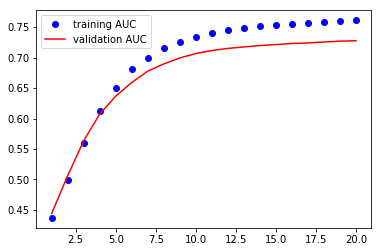

In [1551]:
plt.plot(range(1,len(train_auc)+1),train_auc,'bo',label = 'training AUC')
plt.plot(range(1,len(val_auc)+1),val_auc,'r',label = 'validation AUC')
plt.legend()
plt.show()

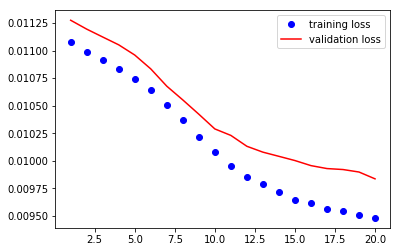

In [1552]:
plt.plot(range(1,len(train_losses)+1),train_losses,'bo',label = 'training loss')
plt.plot(range(1,len(val_losses)+1),val_losses,'r',label = 'validation loss')
plt.legend()
plt.show()

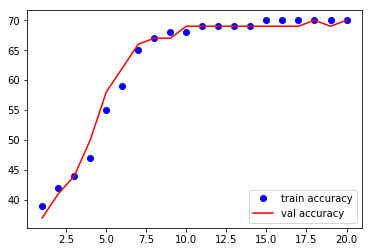

In [1553]:
plt.plot(range(1,len(train_accuracy)+1),train_accuracy,'bo',label = 'train accuracy')
plt.plot(range(1,len(val_accuracy)+1),val_accuracy,'r',label = 'val accuracy')
plt.legend()

In [1554]:
# Model classification metrics

def eval_net(clf, t_loader=val_loader):
    #parameters initialization
    classes = [0,1]

    correct = 0
    total = 0

    y_pred = np.empty([0])
    y_true = np.empty([0])
    #scores = np.empty([0])
    y_score = np.empty([0])

    #Model evaluation
    clf.eval()
    for images, labels in t_loader:
        if is_cuda:
            images = images.cuda()
        images = Variable(images)
        outputs = clf(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted.cpu() == labels).sum()

        y_pred = np.concatenate((y_pred, predicted.data.cpu().numpy()), axis=None)
        y_true = np.concatenate((y_true, labels.data.cpu().numpy()), axis=None)
        #scores = np.concatenate((scores, score.data.cpu().numpy()), axis=None)
        y_score = np.concatenate((y_score, outputs.detach().cpu().numpy()[:, 1]), axis=None)


    conf_matrix = metrics.confusion_matrix(y_true, y_pred)

    np.trace(conf_matrix)

    print("classification rate :", np.trace(conf_matrix)/y_val.shape[0])

    print('Accuracy of the network on the validation set : %d %%' % (100 * correct / total))

    df_conf_matrix = pd.DataFrame(data=conf_matrix, index=classes, columns=classes)

    print("Confusion Matrix for the 2 classes: \n", df_conf_matrix)

    #--------------!

    #y_pred = clf.predict(np_test)
    confmat = confusion_matrix(y_true=y_true, y_pred=y_pred)

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i,
            s=confmat[i, j],
            va='center', ha='center')
    plt.xlabel('predicted label')
    plt.ylabel('true label')
    plt.title("MLP title 2")
    plt.show()
    print("----------Model Classification-------------\n")
    print(classification_report(y_true, y_pred, target_names=['no', 'yes']))
    print(" ")
    print("----------Model Accuracy-------------\n")
    print('Accuracy: %.3f' % accuracy_score(y_true=y_true, y_pred=y_pred))
    print(" ")
    print("----------Model ROC/AUC-------------\n")
    auc = roc_auc_score(y_true, y_score )#y_pred)average='micro'
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    plt.figure()
    plt.plot(fpr, tpr, label='AUC = %0.3f' % auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - '+ 'test 1')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()

classification rate : 0.7065592635212888
Accuracy of the network on the validation set : 70 %
Confusion Matrix for the 2 classes: 
      0    1
0  438  151
1  104  176


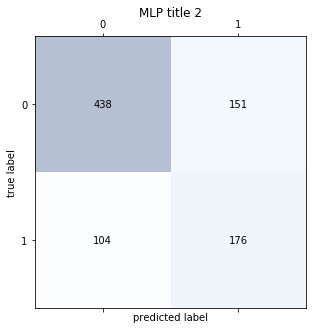

----------Model Classification-------------

             precision    recall  f1-score   support

         no       0.81      0.74      0.77       589
        yes       0.54      0.63      0.58       280

avg / total       0.72      0.71      0.71       869

 
----------Model Accuracy-------------

Accuracy: 0.707
 
----------Model ROC/AUC-------------



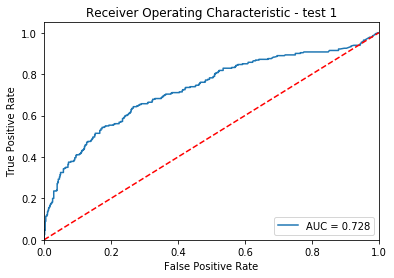

In [1555]:
eval_net(net)

## SET 2

In [1302]:
train_loader = customDataset(X_train_dummies[cols03], y_train)
train_iter = iter(train_loader)

In [1303]:
inputs, labels = train_iter.next()

print('inputs shape on batch size = {}'.format(inputs.size()))
print('labels shape on batch size = {}'.format(labels.size()))

inputs shape on batch size = torch.Size([64, 22])
labels shape on batch size = torch.Size([64])


In [1304]:
val_loader = customDataset(X_val_dummies[cols03], y_val)
val_iter = iter(val_loader)

In [1305]:
len(cols03)

22

In [1306]:
#cols02

In [1307]:
# Choose the right values for x.
input_size = 22
hidden_size = 10    #11
hidden_size2 = 4    #6
num_classes = 2
num_epochs = 20
#batch_size = 100
learning_rate = 0.001

In [1308]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, hidden_size2, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fcM = nn.Linear(hidden_size, hidden_size2)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size2, num_classes)
        self.lr = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fcM(out)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.lr(out)
        return out

In [1309]:
net = Net(input_size, hidden_size, hidden_size2, num_classes)

if is_cuda:
    net.cuda()

In [1310]:
# Loss and Optimizer

#learning_rate = 0.001
#weights = [0.4, 1]
#class_weights=torch.FloatTensor(weights).cuda()   # might need to add is cuda
class_weights=torch.FloatTensor([1, 2])
criterion = nn.CrossEntropyLoss(weight=class_weights)

#criterion = F.cross_entropy()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
# -----------------------------------------------------------------------------------

In [1311]:
#   Training of the model
#   A. Design the setup
def fit(epoch, model, data_loader, opti, phase='training', volatile=False):
    if phase == 'training':
        model.train()
    if phase == 'validation':
        model.eval()
        volatile = True
    
    running_loss = 0.0
    running_correct = 0
    
    y_score1 = np.empty([0]) #
    y_true1 = np.empty([0])  #
    y_pred1 = np.empty([0])
    
    for batch_idx, (data, target) in enumerate(data_loader):

        if is_cuda:
            data, target = data.cuda(), target.cuda()
        data, target = Variable(data, volatile), Variable(target)

        if phase == 'training':
            opti.zero_grad()
        output = model(data)
        #loss = F.nll_loss(output, target)
        loss = criterion(output, target)

        #running_loss += F.nll_loss(output, target, reduction='sum').data.item()
        running_loss += criterion(output, target).cpu().data.item()
        preds = output.data.max(dim=1, keepdim=True)[1]
        
        _, pred = torch.max(output.data, 1)
        
        running_correct += preds.eq(target.data.view_as(preds)).cpu().sum()
        if phase == 'training':
            loss.backward()
            opti.step()
        
        y_score1 = np.concatenate((y_score1, output.detach().cpu().numpy()[:, 1]), axis=None) #
        y_true1 = np.concatenate((y_true1, target.data.cpu().numpy()), axis=None)
        y_pred1 = np.concatenate((y_pred1, pred.data.cpu().numpy()), axis=None)
        
    auc1 = roc_auc_score(y_true1, y_score1) #
    #print(y_true1)
    #print(y_pred1)
    fscore = f1_score(y_true1, y_pred1)

    loss = running_loss / len(data_loader.dataset)
    accuracy = 100. * running_correct / len(data_loader.dataset)

    print(
        '{} loss is {} and {} accuracy is {}/{}, {}'.format(phase, loss, phase, running_correct, len(data_loader.dataset), accuracy ))
    
    print(
        '{} AUC is {}'.format(phase, auc1))
    
    print('F1: %.3f' % fscore)
    print('________________')
    return loss, accuracy, auc1, fscore
# -----------------------------------------------------------------------------------

In [1312]:
#  C. Training final preparation

# ----- Weight initialization
def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_normal_(m.weight)
        #m.bias.data.fill_(0.01)

net.apply(init_weights)

Net(
  (fc1): Linear(in_features=22, out_features=10, bias=True)
  (relu): ReLU()
  (fcM): Linear(in_features=10, out_features=4, bias=True)
  (fc2): Linear(in_features=4, out_features=2, bias=True)
  (lr): Sigmoid()
)

In [1313]:
# ----- Learning rate regularization
#####  NEED TO CHANGE THE patience
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=2, verbose=True)

In [1314]:
#val_loader.dataset.tensors[0].shape

In [1315]:
# ----- Full training
train_losses, train_accuracy, train_auc, train_fscore = [], [], [], []
val_losses, val_accuracy, val_auc, val_fscore= [], [], [], []


start = clock()
for epoch in range(0, epochs):
    epoch_loss, epoch_accuracy, epo_auc, epo_f = fit(epoch, net, train_loader, optimizer, phase='training')
    val_epoch_loss, val_epoch_accuracy, val_epo_auc, val_epo_f = fit(epoch, net, val_loader, optimizer, phase='validation')

    train_losses.append(epoch_loss)
    train_accuracy.append(epoch_accuracy)
    train_auc.append(epo_auc)
    train_fscore.append(epo_f)

    val_losses.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)
    val_auc.append(val_epo_auc)
    val_fscore.append(val_epo_f)

    # Learning rate scheduler update
    scheduler.step(val_epo_auc)

elapsed = clock() - start

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


training loss is 0.010933081049253392 and training accuracy is 2745/4054, 67
training AUC is 0.5169180439190082
F1: 0.000
________________


C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


validation loss is 0.011148114061739694 and validation accuracy is 589/869, 67
validation AUC is 0.5282530924084404
F1: 0.000
________________


C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


training loss is 0.010913643995175882 and training accuracy is 2745/4054, 67
training AUC is 0.5697341231574597
F1: 0.000
________________


C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


validation loss is 0.011131368174514508 and validation accuracy is 589/869, 67
validation AUC is 0.5573975260732477
F1: 0.000
________________


C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


training loss is 0.01088187049984285 and training accuracy is 2745/4054, 67
training AUC is 0.6143811722403816
F1: 0.000
________________


C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


validation loss is 0.011090824052571427 and validation accuracy is 589/869, 67
validation AUC is 0.5820640310453553
F1: 0.000
________________


C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


training loss is 0.010818046819534452 and training accuracy is 2745/4054, 67
training AUC is 0.649534607683113
F1: 0.000
________________
validation loss is 0.010991784590709059 and validation accuracy is 590/869, 67
validation AUC is 0.6425873150618482
F1: 0.007
________________
training loss is 0.010640764962762344 and training accuracy is 2894/4054, 71
training AUC is 0.7081793273692985
F1: 0.382
________________
validation loss is 0.010747548145583914 and validation accuracy is 628/869, 72
validation AUC is 0.7062909289352415
F1: 0.528
________________
training loss is 0.010272824299647177 and training accuracy is 2884/4054, 71
training AUC is 0.7463673795399928
F1: 0.584
________________
validation loss is 0.010368183032278362 and validation accuracy is 612/869, 70
validation AUC is 0.7231475867087072
F1: 0.565
________________
training loss is 0.009908274235134943 and training accuracy is 2859/4054, 70
training AUC is 0.7592034131089097
F1: 0.591
________________
validation loss 

In [1316]:
print(elapsed)

3.550710558586161


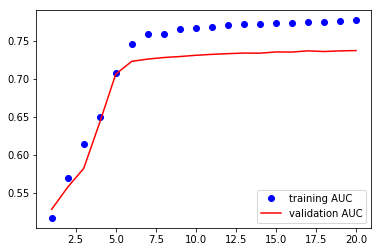

In [1317]:
plt.plot(range(1,len(train_auc)+1),train_auc,'bo',label = 'training AUC')
plt.plot(range(1,len(val_auc)+1),val_auc,'r',label = 'validation AUC')
plt.legend()
plt.show()

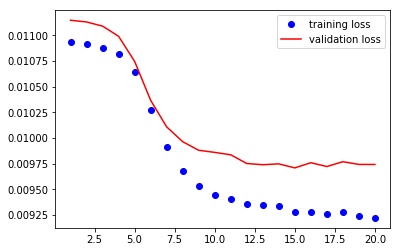

In [1318]:
plt.plot(range(1,len(train_losses)+1),train_losses,'bo',label = 'training loss')
plt.plot(range(1,len(val_losses)+1),val_losses,'r',label = 'validation loss')
plt.legend()
plt.show()

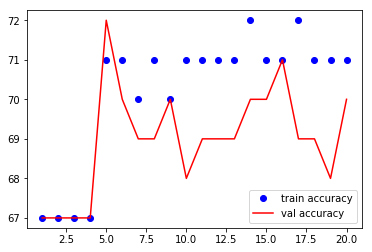

In [1319]:
plt.plot(range(1,len(train_accuracy)+1),train_accuracy,'bo',label = 'train accuracy')
plt.plot(range(1,len(val_accuracy)+1),val_accuracy,'r',label = 'val accuracy')
plt.legend()

In [1320]:
# Model classification metrics

def eval_net(clf, t_loader=val_loader):
    #parameters initialization
    classes = [0,1]

    correct = 0
    total = 0

    y_pred = np.empty([0])
    y_true = np.empty([0])
    #scores = np.empty([0])
    y_score = np.empty([0])

    #Model evaluation
    clf.eval()
    for images, labels in t_loader:
        if is_cuda:
            images = images.cuda()
        images = Variable(images)
        outputs = clf(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted.cpu() == labels).sum()

        y_pred = np.concatenate((y_pred, predicted.data.cpu().numpy()), axis=None)
        y_true = np.concatenate((y_true, labels.data.cpu().numpy()), axis=None)
        #scores = np.concatenate((scores, score.data.cpu().numpy()), axis=None)
        y_score = np.concatenate((y_score, outputs.detach().cpu().numpy()[:, 1]), axis=None)


    conf_matrix = metrics.confusion_matrix(y_true, y_pred)

    np.trace(conf_matrix)

    print("classification rate :", np.trace(conf_matrix)/y_val.shape[0])

    print('Accuracy of the network on the validation set : %d %%' % (100 * correct / total))

    df_conf_matrix = pd.DataFrame(data=conf_matrix, index=classes, columns=classes)

    print("Confusion Matrix for the 2 classes: \n", df_conf_matrix)

    #--------------!

    #y_pred = clf.predict(np_test)
    confmat = confusion_matrix(y_true=y_true, y_pred=y_pred)

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i,
            s=confmat[i, j],
            va='center', ha='center')
    plt.xlabel('predicted label')
    plt.ylabel('true label')
    plt.title("MLP title 2")
    plt.show()
    print("----------Model Classification-------------\n")
    print(classification_report(y_true, y_pred, target_names=['no', 'yes']))
    print(" ")
    print("----------Model Accuracy-------------\n")
    print('Accuracy: %.3f' % accuracy_score(y_true=y_true, y_pred=y_pred))
    print(" ")
    print("----------Model ROC/AUC-------------\n")
    auc = roc_auc_score(y_true, y_score )#y_pred)average='micro'
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    plt.figure()
    plt.plot(fpr, tpr, label='AUC = %0.3f' % auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - '+ 'test 1')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()

classification rate : 0.7031070195627158
Accuracy of the network on the validation set : 70 %
Confusion Matrix for the 2 classes: 
      0    1
0  439  150
1  108  172


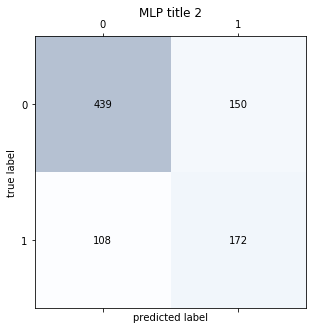

----------Model Classification-------------

             precision    recall  f1-score   support

         no       0.80      0.75      0.77       589
        yes       0.53      0.61      0.57       280

avg / total       0.72      0.70      0.71       869

 
----------Model Accuracy-------------

Accuracy: 0.703
 
----------Model ROC/AUC-------------



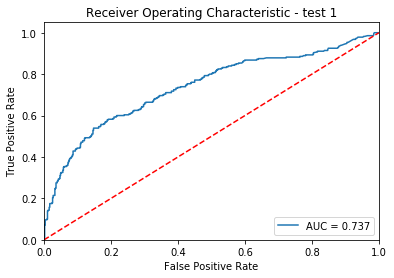

In [1321]:
eval_net(net)

#### --- Fscore

In [121]:
net2 = Net(input_size, hidden_size, hidden_size2, num_classes)

if is_cuda:
    net2.cuda()

In [122]:
# Loss and Optimizer

#learning_rate = 0.001
#weights = [0.4, 1]
#class_weights=torch.FloatTensor(weights).cuda()   # might need to add is cuda
class_weights=torch.FloatTensor([0.33, 0.67])
criterion = nn.CrossEntropyLoss(weight=class_weights)

#criterion = F.cross_entropy()
optimizer2 = torch.optim.Adam(net2.parameters(), lr=learning_rate)
# -----------------------------------------------------------------------------------

In [123]:
#  C. Training final preparation

# ----- Weight initialization
def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_normal_(m.weight)
        #m.bias.data.fill_(0.01)

net2.apply(init_weights)

Net(
  (fc1): Linear(in_features=22, out_features=11, bias=True)
  (relu): ReLU()
  (fcM): Linear(in_features=11, out_features=6, bias=True)
  (fc2): Linear(in_features=6, out_features=2, bias=True)
  (lr): Sigmoid()
)

In [124]:
# ----- Learning rate regularization
#####  NEED TO CHANGE THE patience
scheduler2 = optim.lr_scheduler.ReduceLROnPlateau(optimizer2, mode='max', patience=2, verbose=True)

In [125]:
# ----- Full training
train_losses1, train_accuracy1, train_auc1, train_fscore1 = [], [], [], []
val_losses1, val_accuracy1, val_auc1, val_fscore1= [], [], [], []

start = clock()
for epoch in range(0, epochs):
    epoch_loss1, epoch_accuracy1, epo_auc1, epo_f1 = fit(epoch, net2, train_loader, optimizer2, phase='training')
    val_epoch_loss1, val_epoch_accuracy1, val_epo_auc1, val_epo_f1 = fit(epoch, net2, val_loader, optimizer2, phase='validation')

    train_losses1.append(epoch_loss1)
    train_accuracy1.append(epoch_accuracy1)
    train_auc1.append(epo_auc1)
    train_fscore1.append(epo_f1)

    val_losses1.append(val_epoch_loss1)
    val_accuracy1.append(val_epoch_accuracy1)
    val_auc1.append(val_epo_auc1)
    val_fscore1.append(val_epo_f1)

    # Learning rate scheduler update
    scheduler2.step(val_epo_f1)

elapsed = clock() - start

training loss is 0.010812093794610504 and training accuracy is 2269/4054, 55
training AUC is 0.6193395589731172
F1: 0.475
________________
validation loss is 0.011012909601692227 and validation accuracy is 462/869, 53
validation AUC is 0.6117238661169051
F1: 0.476
________________
training loss is 0.010579013183426257 and training accuracy is 2369/4054, 58
training AUC is 0.6879892741994961
F1: 0.530
________________
validation loss is 0.010733262716146278 and validation accuracy is 537/869, 61
validation AUC is 0.6701461314576764
F1: 0.495
________________
training loss is 0.010215814515294026 and training accuracy is 2701/4054, 66
training AUC is 0.7296949380845235
F1: 0.569
________________
validation loss is 0.010398070543352836 and validation accuracy is 574/869, 66
validation AUC is 0.6957039776861509
F1: 0.516
________________
training loss is 0.00985538980086919 and training accuracy is 2863/4054, 70
training AUC is 0.7465254556864971
F1: 0.589
________________
validation loss 

In [126]:
print(elapsed)

3.00694321536254


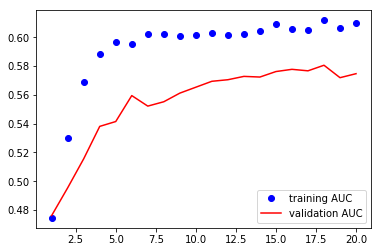

In [127]:
plt.plot(range(1,len(train_fscore1)+1),train_fscore1,'bo',label = 'training AUC')
plt.plot(range(1,len(val_fscore1)+1),val_fscore1,'r',label = 'validation AUC')
plt.legend()
plt.show()

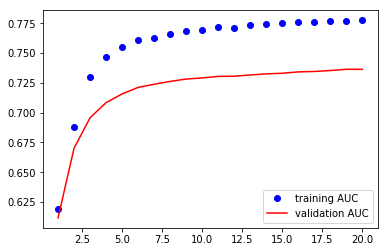

In [128]:
plt.plot(range(1,len(train_auc1)+1),train_auc1,'bo',label = 'training AUC')
plt.plot(range(1,len(val_auc1)+1),val_auc1,'r',label = 'validation AUC')
plt.legend()
plt.show()

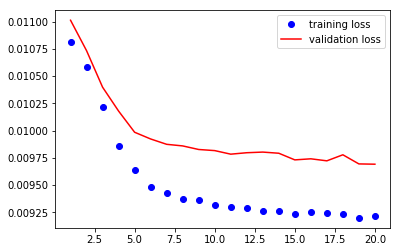

In [129]:
plt.plot(range(1,len(train_losses1)+1),train_losses1,'bo',label = 'training loss')
plt.plot(range(1,len(val_losses1)+1),val_losses1,'r',label = 'validation loss')
plt.legend()
plt.show()

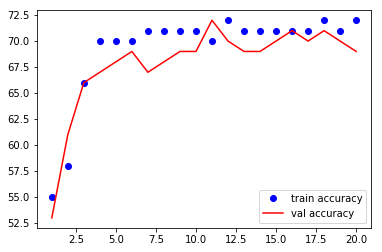

In [130]:
plt.plot(range(1,len(train_accuracy1)+1),train_accuracy1,'bo',label = 'train accuracy')
plt.plot(range(1,len(val_accuracy1)+1),val_accuracy1,'r',label = 'val accuracy')
plt.legend()
plt.show()

classification rate : 0.6985040276179517
Accuracy of the network on the validation set : 69 %
Confusion Matrix for the 2 classes: 
      0    1
0  430  159
1  103  177


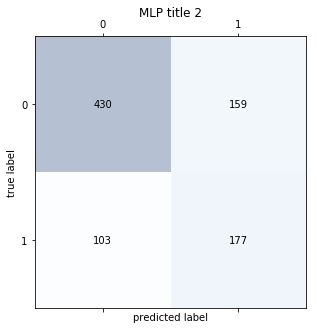

----------Model Classification-------------

             precision    recall  f1-score   support

         no       0.81      0.73      0.77       589
        yes       0.53      0.63      0.57       280

avg / total       0.72      0.70      0.70       869

 
----------Model Accuracy-------------

Accuracy: 0.699
 
----------Model ROC/AUC-------------



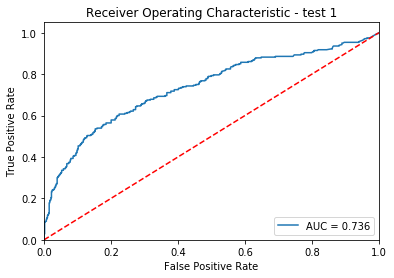

In [131]:
eval_net(net2)

### 4 Layers

In [132]:
len(cols03)

22

In [133]:
# Choose the right values for x.
input_size = 22
hidden_size1 = 15
hidden_size21 = 8
hidden_size31 = 4
num_classes = 2
#num_epochs = 20
#batch_size = 100
learning_rate = 0.001

In [134]:
class Net2(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size21, hidden_size31, num_classes):
        super(Net2, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fcM = nn.Linear(hidden_size1, hidden_size21)
        self.relu2 = nn.ReLU()
        self.fcM1 = nn.Linear(hidden_size21, hidden_size31)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size31, num_classes)
        self.lr = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fcM(out)
        out = self.relu2(out)
        out = self.fcM1(out)
        out = self.relu3(out)
        out = self.fc2(out)
        out = self.lr(out)
        return out

In [135]:
net3 = Net2(input_size, hidden_size1, hidden_size21, hidden_size31, num_classes)

if is_cuda:
    net3.cuda()

In [136]:
# Loss and Optimizer

#learning_rate = 0.001
#weights = [0.4, 1]
#class_weights=torch.FloatTensor(weights).cuda()   # might need to add is cuda
class_weights=torch.FloatTensor([0.33, 0.67])
criterion = nn.CrossEntropyLoss(weight=class_weights)

#criterion = F.cross_entropy()
optimizer3 = torch.optim.Adam(net3.parameters(), lr=learning_rate)
# -----------------------------------------------------------------------------------

In [137]:
#  C. Training final preparation

# ----- Weight initialization
def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_normal_(m.weight)
        #m.bias.data.fill_(0.01)

net3.apply(init_weights)

Net2(
  (fc1): Linear(in_features=22, out_features=15, bias=True)
  (relu1): ReLU()
  (fcM): Linear(in_features=15, out_features=8, bias=True)
  (relu2): ReLU()
  (fcM1): Linear(in_features=8, out_features=4, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=4, out_features=2, bias=True)
  (lr): Sigmoid()
)

In [138]:
# ----- Learning rate regularization
#####  NEED TO CHANGE THE patience
scheduler3 = optim.lr_scheduler.ReduceLROnPlateau(optimizer3, mode='max', patience=2, verbose=True)

In [139]:
# ----- Full training
train_losses3, train_accuracy3, train_auc3, train_fscore3 = [], [], [], []
val_losses3, val_accuracy3, val_auc3, val_fscore3= [], [], [], []


start = clock()
for epoch in range(0, epochs):
    epoch_loss3, epoch_accuracy3, epo_auc3, epo_f3 = fit(epoch, net3, train_loader, optimizer3, phase='training')
    val_epoch_loss3, val_epoch_accuracy3, val_epo_auc3, val_epo_f3 = fit(epoch, net3, val_loader, optimizer3, phase='validation')

    train_losses3.append(epoch_loss3)
    train_accuracy3.append(epoch_accuracy3)
    train_auc3.append(epo_auc3)
    train_fscore3.append(epo_f3)

    val_losses3.append(val_epoch_loss3)
    val_accuracy3.append(val_epoch_accuracy3)
    val_auc3.append(val_epo_auc3)
    val_fscore3.append(val_epo_f3)

    # Learning rate scheduler update
    scheduler3.step(val_epo_auc3)

elapsed = clock() - start

training loss is 0.011005272889407797 and training accuracy is 2159/4054, 53
training AUC is 0.5312212912984369
F1: 0.317
________________
validation loss is 0.011095834477998582 and validation accuracy is 495/869, 56
validation AUC is 0.6178904923599321
F1: 0.450
________________
training loss is 0.010857181223849093 and training accuracy is 2387/4054, 58
training AUC is 0.5997274021382025
F1: 0.419
________________
validation loss is 0.01094228907202138 and validation accuracy is 550/869, 63
validation AUC is 0.645740358961921
F1: 0.421
________________
training loss is 0.010637964661861206 and training accuracy is 2597/4054, 64
training AUC is 0.6554198828065751
F1: 0.478
________________
validation loss is 0.010675155663792091 and validation accuracy is 573/869, 65
validation AUC is 0.6850624545234054
F1: 0.488
________________
training loss is 0.010248363297386716 and training accuracy is 2735/4054, 67
training AUC is 0.7042899027469905
F1: 0.543
________________
validation loss i

In [140]:
print(elapsed)

3.3536188473037782


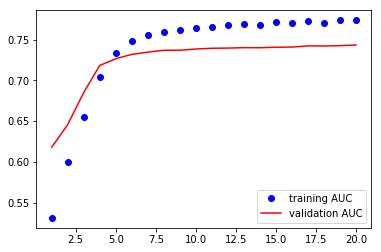

In [141]:
plt.plot(range(1,len(train_auc3)+1),train_auc3,'bo',label = 'training AUC')
plt.plot(range(1,len(val_auc3)+1),val_auc3,'r',label = 'validation AUC')
plt.legend()
plt.show()

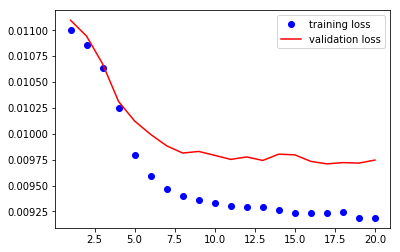

In [142]:
plt.plot(range(1,len(train_losses3)+1),train_losses3,'bo',label = 'training loss')
plt.plot(range(1,len(val_losses3)+1),val_losses3,'r',label = 'validation loss')
plt.legend()
plt.show()

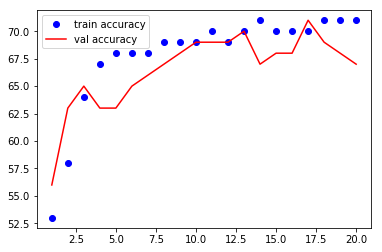

In [143]:
plt.plot(range(1,len(train_accuracy3)+1),train_accuracy3,'bo',label = 'train accuracy')
plt.plot(range(1,len(val_accuracy3)+1),val_accuracy3,'r',label = 'val accuracy')
plt.legend()

classification rate : 0.6743383199079401
Accuracy of the network on the validation set : 67 %
Confusion Matrix for the 2 classes: 
      0    1
0  394  195
1   88  192


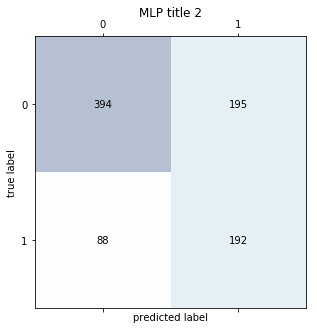

----------Model Classification-------------

             precision    recall  f1-score   support

         no       0.82      0.67      0.74       589
        yes       0.50      0.69      0.58       280

avg / total       0.71      0.67      0.68       869

 
----------Model Accuracy-------------

Accuracy: 0.674
 
----------Model ROC/AUC-------------



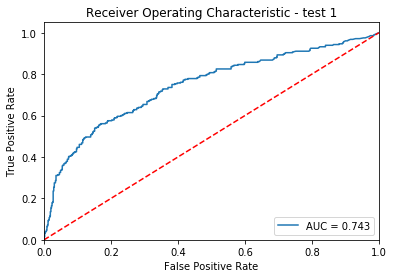

In [144]:
eval_net(net3)

#### --- Fscore

In [145]:
class Net2(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size21, hidden_size31, num_classes):
        super(Net2, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fcM = nn.Linear(hidden_size1, hidden_size21)
        self.relu2 = nn.ReLU()
        self.fcM1 = nn.Linear(hidden_size21, hidden_size31)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size31, num_classes)
        self.lr = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fcM(out)
        out = self.relu2(out)
        out = self.fcM1(out)
        out = self.relu3(out)
        out = self.fc2(out)
        out = self.lr(out)
        return out

In [146]:
net4 = Net2(input_size, hidden_size1, hidden_size21, hidden_size31, num_classes)

if is_cuda:
    net4.cuda()

In [147]:
# Loss and Optimizer

#learning_rate = 0.001
#weights = [0.4, 1]
#class_weights=torch.FloatTensor(weights).cuda()   # might need to add is cuda
class_weights=torch.FloatTensor([0.33, 0.67])
criterion = nn.CrossEntropyLoss(weight=class_weights)

#criterion = F.cross_entropy()
optimizer4 = torch.optim.Adam(net4.parameters(), lr=learning_rate)
# -----------------------------------------------------------------------------------

In [148]:
#  C. Training final preparation

# ----- Weight initialization
def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_normal_(m.weight)
        #m.bias.data.fill_(0.01)

net4.apply(init_weights)

Net2(
  (fc1): Linear(in_features=22, out_features=15, bias=True)
  (relu1): ReLU()
  (fcM): Linear(in_features=15, out_features=8, bias=True)
  (relu2): ReLU()
  (fcM1): Linear(in_features=8, out_features=4, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=4, out_features=2, bias=True)
  (lr): Sigmoid()
)

In [149]:
# ----- Learning rate regularization
#####  NEED TO CHANGE THE patience
scheduler4 = optim.lr_scheduler.ReduceLROnPlateau(optimizer4, mode='max', patience=2, verbose=True)

In [150]:
# ----- Full training
train_losses4, train_accuracy4, train_auc4, train_fscore4 = [], [], [], []
val_losses4, val_accuracy4, val_auc4, val_fscore4= [], [], [], []


start = clock()
for epoch in range(0, epochs):
    epoch_loss4, epoch_accuracy4, epo_auc4, epo_f4 = fit(epoch, net4, train_loader, optimizer4, phase='training')
    val_epoch_loss4, val_epoch_accuracy4, val_epo_auc4, val_epo_f4 = fit(epoch, net4, val_loader, optimizer4, phase='validation')

    train_losses4.append(epoch_loss4)
    train_accuracy4.append(epoch_accuracy4)
    train_auc4.append(epo_auc4)
    train_fscore4.append(epo_f4)

    val_losses4.append(val_epoch_loss4)
    val_accuracy4.append(val_epoch_accuracy4)
    val_auc4.append(val_epo_auc4)
    val_fscore4.append(val_epo_f4)

    # Learning rate scheduler update
    scheduler4.step(val_epo_f4)

elapsed = clock() - start

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


training loss is 0.010905799750453684 and training accuracy is 2745/4054, 67
training AUC is 0.5845472217699798
F1: 0.000
________________


C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


validation loss is 0.011050726656809501 and validation accuracy is 589/869, 67
validation AUC is 0.6499060150375939
F1: 0.000
________________


C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


training loss is 0.010749148555030126 and training accuracy is 2745/4054, 67
training AUC is 0.6768944438182625
F1: 0.000
________________


C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


validation loss is 0.010864226055364752 and validation accuracy is 589/869, 67
validation AUC is 0.6861114479747756
F1: 0.000
________________
training loss is 0.01053250638734077 and training accuracy is 2754/4054, 67
training AUC is 0.711094969532771
F1: 0.058
________________
validation loss is 0.010719537254855877 and validation accuracy is 611/869, 70
validation AUC is 0.7017675236478293
F1: 0.259
________________
training loss is 0.010328776300041677 and training accuracy is 2863/4054, 70
training AUC is 0.7256471590126363
F1: 0.441
________________
validation loss is 0.010531131225296213 and validation accuracy is 631/869, 72
validation AUC is 0.7237781954887218
F1: 0.559
________________
training loss is 0.010052696701100617 and training accuracy is 2901/4054, 71
training AUC is 0.7464134386988774
F1: 0.580
________________
validation loss is 0.010281464104273788 and validation accuracy is 610/869, 70
validation AUC is 0.7332252000970169
F1: 0.569
________________
training loss

In [151]:
print(elapsed)

3.7084201152949277


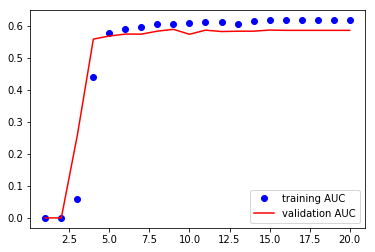

In [152]:
plt.plot(range(1,len(train_fscore4)+1),train_fscore4,'bo',label = 'training AUC')
plt.plot(range(1,len(val_fscore4)+1),val_fscore4,'r',label = 'validation AUC')
plt.legend()
plt.show()

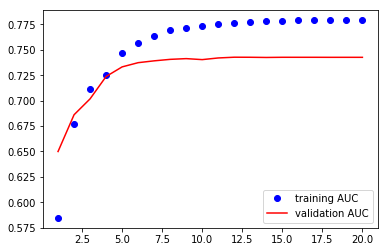

In [153]:
plt.plot(range(1,len(train_auc4)+1),train_auc4,'bo',label = 'training AUC')
plt.plot(range(1,len(val_auc4)+1),val_auc4,'r',label = 'validation AUC')
plt.legend()
plt.show()

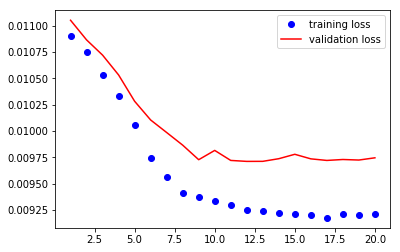

In [154]:
plt.plot(range(1,len(train_losses4)+1),train_losses4,'bo',label = 'training loss')
plt.plot(range(1,len(val_losses4)+1),val_losses4,'r',label = 'validation loss')
plt.legend()
plt.show()

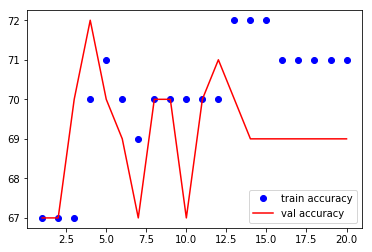

In [155]:
plt.plot(range(1,len(train_accuracy4)+1),train_accuracy4,'bo',label = 'train accuracy')
plt.plot(range(1,len(val_accuracy4)+1),val_accuracy4,'r',label = 'val accuracy')
plt.legend()

classification rate : 0.6985040276179517
Accuracy of the network on the validation set : 69 %
Confusion Matrix for the 2 classes: 
      0    1
0  421  168
1   94  186


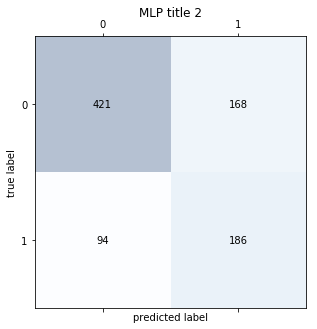

----------Model Classification-------------

             precision    recall  f1-score   support

         no       0.82      0.71      0.76       589
        yes       0.53      0.66      0.59       280

avg / total       0.72      0.70      0.71       869

 
----------Model Accuracy-------------

Accuracy: 0.699
 
----------Model ROC/AUC-------------



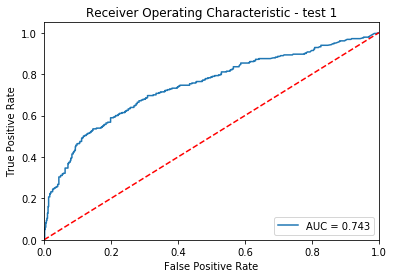

In [156]:
eval_net(net4)

## SET 3

In [157]:
len(cols13)

21

In [158]:
train_loader = customDataset(X_train_dummies[cols13], y_train)
train_iter = iter(train_loader)

In [159]:
inputs, labels = train_iter.next()

print('inputs shape on batch size = {}'.format(inputs.size()))
print('labels shape on batch size = {}'.format(labels.size()))

inputs shape on batch size = torch.Size([64, 21])
labels shape on batch size = torch.Size([64])


In [174]:
val_loader = customDataset(X_val_dummies[cols13], y_val)
val_iter = iter(val_loader)

In [179]:
val_loader.dataset.tensors[0].shape

torch.Size([869, 21])

In [198]:
# Choose the right values for x.
input_size1 = 21
hidden_size = 11
hidden_size2 = 6
num_classes = 2
num_epochs = 20
#batch_size = 100
learning_rate = 0.001

In [199]:
class Netp(nn.Module):
    def __init__(self, input_size1, hidden_size, hidden_size2, num_classes):
        super(Netp, self).__init__()
        self.fc1 = nn.Linear(input_size1, hidden_size)
        self.relu = nn.ReLU()
        self.fcM = nn.Linear(hidden_size, hidden_size2)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size2, num_classes)
        self.lr = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fcM(out)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.lr(out)
        return out

In [200]:
net5 = Netp(input_size1, hidden_size, hidden_size2, num_classes)

if is_cuda:
    net5.cuda()

In [201]:
# Loss and Optimizer

#learning_rate = 0.001
#weights = [0.4, 1]
#class_weights=torch.FloatTensor(weights).cuda()   # might need to add is cuda
class_weights=torch.FloatTensor([0.33, 0.67])
criterion = nn.CrossEntropyLoss(weight=class_weights)

#criterion = F.cross_entropy()
optimizer5 = torch.optim.Adam(net5.parameters(), lr=learning_rate)
# -----------------------------------------------------------------------------------

In [202]:
#  C. Training final preparation

# ----- Weight initialization
def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_normal_(m.weight)
        #m.bias.data.fill_(0.01)

net5.apply(init_weights)

Netp(
  (fc1): Linear(in_features=21, out_features=11, bias=True)
  (relu): ReLU()
  (fcM): Linear(in_features=11, out_features=6, bias=True)
  (fc2): Linear(in_features=6, out_features=2, bias=True)
  (lr): Sigmoid()
)

In [203]:
# ----- Learning rate regularization
#####  NEED TO CHANGE THE patience
scheduler5 = optim.lr_scheduler.ReduceLROnPlateau(optimizer5, mode='max', patience=2, verbose=True)

In [122]:
#val_loader.dataset.tensors[0].shape

torch.Size([869, 15])

In [204]:
# ----- Full training
train_losses, train_accuracy, train_auc, train_fscore = [], [], [], []
val_losses, val_accuracy, val_auc, val_fscore= [], [], [], []


start = clock()
for epoch in range(0, epochs):
    epoch_loss, epoch_accuracy, epo_auc, epo_f = fit(epoch, net5, train_loader, optimizer5, phase='training')
    val_epoch_loss, val_epoch_accuracy, val_epo_auc, val_epo_f = fit(epoch, net5, val_loader, optimizer5, phase='validation')

    train_losses.append(epoch_loss)
    train_accuracy.append(epoch_accuracy)
    train_auc.append(epo_auc)
    train_fscore.append(epo_f)

    val_losses.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)
    val_auc.append(val_epo_auc)
    val_fscore.append(val_epo_f)

    # Learning rate scheduler update
    scheduler5.step(val_epo_auc)

elapsed = clock() - start

training loss is 0.010887939425954457 and training accuracy is 2700/4054, 66
training AUC is 0.5543463286954126
F1: 0.290
________________
validation loss is 0.011017626050701076 and validation accuracy is 586/869, 67
validation AUC is 0.5860265583313121
F1: 0.428
________________
training loss is 0.010675973223534252 and training accuracy is 2722/4054, 67
training AUC is 0.6239065124311026
F1: 0.482
________________
validation loss is 0.010818629599550376 and validation accuracy is 571/869, 65
validation AUC is 0.6559331797235024
F1: 0.530
________________
training loss is 0.010436488671084019 and training accuracy is 2715/4054, 66
training AUC is 0.6946266633826905
F1: 0.558
________________
validation loss is 0.010572982876978481 and validation accuracy is 571/869, 65
validation AUC is 0.6969833858840649
F1: 0.551
________________
training loss is 0.01013261169474526 and training accuracy is 2767/4054, 68
training AUC is 0.7323738834828517
F1: 0.571
________________
validation loss 

In [205]:
print(elapsed)

3.145278929603137


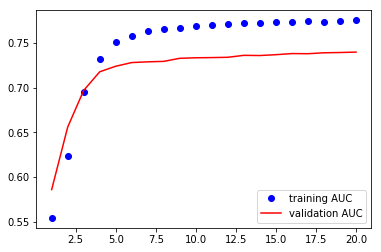

In [206]:
plt.plot(range(1,len(train_auc)+1),train_auc,'bo',label = 'training AUC')
plt.plot(range(1,len(val_auc)+1),val_auc,'r',label = 'validation AUC')
plt.legend()
plt.show()

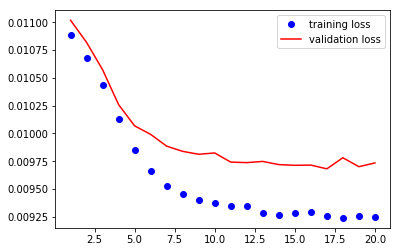

In [207]:
plt.plot(range(1,len(train_losses)+1),train_losses,'bo',label = 'training loss')
plt.plot(range(1,len(val_losses)+1),val_losses,'r',label = 'validation loss')
plt.legend()
plt.show()

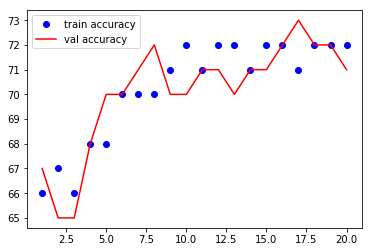

In [208]:
plt.plot(range(1,len(train_accuracy)+1),train_accuracy,'bo',label = 'train accuracy')
plt.plot(range(1,len(val_accuracy)+1),val_accuracy,'r',label = 'val accuracy')
plt.legend()
plt.show()

In [210]:
input_size1

21

classification rate : 0.7192174913693901
Accuracy of the network on the validation set : 71 %
Confusion Matrix for the 2 classes: 
      0    1
0  452  137
1  107  173


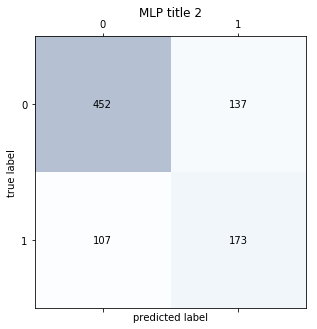

----------Model Classification-------------

             precision    recall  f1-score   support

         no       0.81      0.77      0.79       589
        yes       0.56      0.62      0.59       280

avg / total       0.73      0.72      0.72       869

 
----------Model Accuracy-------------

Accuracy: 0.719
 
----------Model ROC/AUC-------------



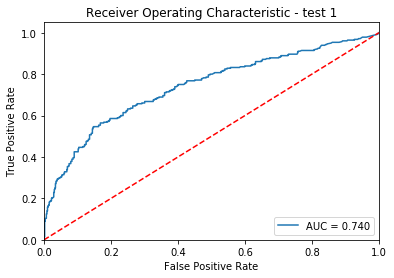

In [212]:
eval_net(net5, val_loader)

#### --- Fscore

In [213]:
net6 = Netp(input_size1, hidden_size, hidden_size2, num_classes)

if is_cuda:
    net6.cuda()

In [214]:
# Loss and Optimizer

#learning_rate = 0.001
#weights = [0.4, 1]
#class_weights=torch.FloatTensor(weights).cuda()   # might need to add is cuda
class_weights=torch.FloatTensor([0.33, 0.67])
criterion = nn.CrossEntropyLoss(weight=class_weights)

#criterion = F.cross_entropy()
optimizer6 = torch.optim.Adam(net6.parameters(), lr=learning_rate)
# -----------------------------------------------------------------------------------

In [215]:
#  C. Training final preparation

# ----- Weight initialization
def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_normal_(m.weight)
        #m.bias.data.fill_(0.01)

net6.apply(init_weights)

Netp(
  (fc1): Linear(in_features=21, out_features=11, bias=True)
  (relu): ReLU()
  (fcM): Linear(in_features=11, out_features=6, bias=True)
  (fc2): Linear(in_features=6, out_features=2, bias=True)
  (lr): Sigmoid()
)

In [216]:
# ----- Learning rate regularization
#####  NEED TO CHANGE THE patience
scheduler6 = optim.lr_scheduler.ReduceLROnPlateau(optimizer6, mode='max', patience=2, verbose=True)

In [217]:
# ----- Full training
train_losses1, train_accuracy1, train_auc1, train_fscore1 = [], [], [], []
val_losses1, val_accuracy1, val_auc1, val_fscore1= [], [], [], []

start = clock()
for epoch in range(0, epochs):
    epoch_loss1, epoch_accuracy1, epo_auc1, epo_f1 = fit(epoch, net6, train_loader, optimizer6, phase='training')
    val_epoch_loss1, val_epoch_accuracy1, val_epo_auc1, val_epo_f1 = fit(epoch, net6, val_loader, optimizer6, phase='validation')

    train_losses1.append(epoch_loss1)
    train_accuracy1.append(epoch_accuracy1)
    train_auc1.append(epo_auc1)
    train_fscore1.append(epo_f1)

    val_losses1.append(val_epoch_loss1)
    val_accuracy1.append(val_epoch_accuracy1)
    val_auc1.append(val_epo_auc1)
    val_fscore1.append(val_epo_f1)

    # Learning rate scheduler update
    scheduler6.step(val_epo_f1)

elapsed = clock() - start

training loss is 0.010935211525683221 and training accuracy is 1574/4054, 38
training AUC is 0.4971898347018887
F1: 0.468
________________
validation loss is 0.011116164737521436 and validation accuracy is 415/869, 47
validation AUC is 0.5306330341983992
F1: 0.457
________________
training loss is 0.010808067996336077 and training accuracy is 2422/4054, 59
training AUC is 0.6118031117066797
F1: 0.489
________________
validation loss is 0.010997070541864709 and validation accuracy is 579/869, 66
validation AUC is 0.6197277467863207
F1: 0.497
________________
training loss is 0.010656418959731002 and training accuracy is 2831/4054, 69
training AUC is 0.6878530448443658
F1: 0.525
________________
validation loss is 0.010851560994313968 and validation accuracy is 610/869, 70
validation AUC is 0.6696883337375698
F1: 0.510
________________
training loss is 0.010488828665291551 and training accuracy is 2921/4054, 72
training AUC is 0.7244892790697998
F1: 0.544
________________
validation loss

In [218]:
print(elapsed)

3.4510932946909634


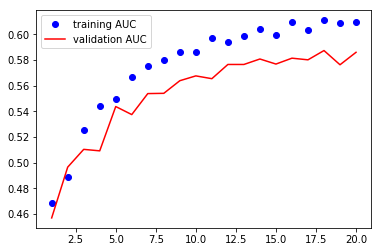

In [219]:
plt.plot(range(1,len(train_fscore1)+1),train_fscore1,'bo',label = 'training AUC')
plt.plot(range(1,len(val_fscore1)+1),val_fscore1,'r',label = 'validation AUC')
plt.legend()
plt.show()

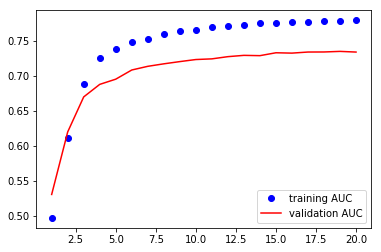

In [220]:
plt.plot(range(1,len(train_auc1)+1),train_auc1,'bo',label = 'training AUC')
plt.plot(range(1,len(val_auc1)+1),val_auc1,'r',label = 'validation AUC')
plt.legend()
plt.show()

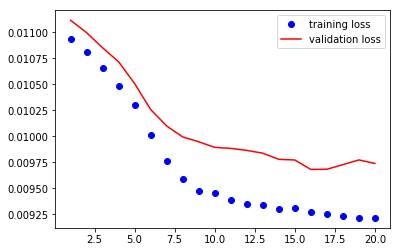

In [221]:
plt.plot(range(1,len(train_losses1)+1),train_losses1,'bo',label = 'training loss')
plt.plot(range(1,len(val_losses1)+1),val_losses1,'r',label = 'validation loss')
plt.legend()
plt.show()

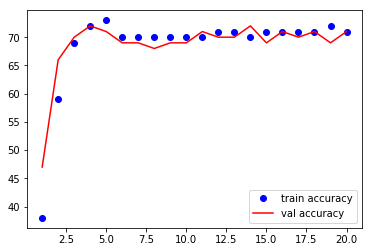

In [222]:
plt.plot(range(1,len(train_accuracy1)+1),train_accuracy1,'bo',label = 'train accuracy')
plt.plot(range(1,len(val_accuracy1)+1),val_accuracy1,'r',label = 'val accuracy')
plt.legend()
plt.show()

classification rate : 0.7123130034522439
Accuracy of the network on the validation set : 71 %
Confusion Matrix for the 2 classes: 
      0    1
0  442  147
1  103  177


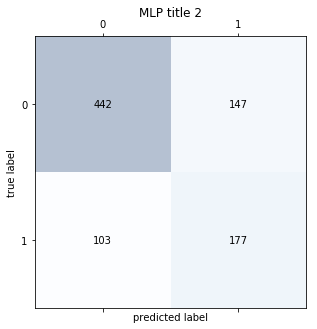

----------Model Classification-------------

             precision    recall  f1-score   support

         no       0.81      0.75      0.78       589
        yes       0.55      0.63      0.59       280

avg / total       0.73      0.71      0.72       869

 
----------Model Accuracy-------------

Accuracy: 0.712
 
----------Model ROC/AUC-------------



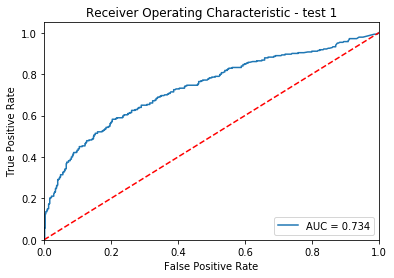

In [224]:
eval_net(net6, val_loader)

### 4 Layers

In [225]:
len(cols12)

21

In [226]:
# Choose the right values for x.
input_size = 21
hidden_size1 = 15
hidden_size21 = 8
hidden_size31 = 4
num_classes = 2
#num_epochs = 20
#batch_size = 100
learning_rate = 0.001

In [227]:
class Net2(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size21, hidden_size31, num_classes):
        super(Net2, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fcM = nn.Linear(hidden_size1, hidden_size21)
        self.relu2 = nn.ReLU()
        self.fcM1 = nn.Linear(hidden_size21, hidden_size31)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size31, num_classes)
        self.lr = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fcM(out)
        out = self.relu2(out)
        out = self.fcM1(out)
        out = self.relu3(out)
        out = self.fc2(out)
        out = self.lr(out)
        return out

In [229]:
net7 = Net2(input_size, hidden_size1, hidden_size21, hidden_size31, num_classes)

if is_cuda:
    net7.cuda()

In [230]:
# Loss and Optimizer

#learning_rate = 0.001
#weights = [0.4, 1]
#class_weights=torch.FloatTensor(weights).cuda()   # might need to add is cuda
class_weights=torch.FloatTensor([0.33, 0.67])
criterion = nn.CrossEntropyLoss(weight=class_weights)

#criterion = F.cross_entropy()
optimizer7 = torch.optim.Adam(net7.parameters(), lr=learning_rate)
# -----------------------------------------------------------------------------------

In [231]:
#  C. Training final preparation

# ----- Weight initialization
def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_normal_(m.weight)
        #m.bias.data.fill_(0.01)

net7.apply(init_weights)

Net2(
  (fc1): Linear(in_features=21, out_features=15, bias=True)
  (relu1): ReLU()
  (fcM): Linear(in_features=15, out_features=8, bias=True)
  (relu2): ReLU()
  (fcM1): Linear(in_features=8, out_features=4, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=4, out_features=2, bias=True)
  (lr): Sigmoid()
)

In [232]:
# ----- Learning rate regularization
#####  NEED TO CHANGE THE patience
scheduler7 = optim.lr_scheduler.ReduceLROnPlateau(optimizer7, mode='max', patience=2, verbose=True)

In [233]:
# ----- Full training
train_losses3, train_accuracy3, train_auc3, train_fscore3 = [], [], [], []
val_losses3, val_accuracy3, val_auc3, val_fscore3= [], [], [], []


start = clock()
for epoch in range(0, epochs):
    epoch_loss3, epoch_accuracy3, epo_auc3, epo_f3 = fit(epoch, net7, train_loader, optimizer7, phase='training')
    val_epoch_loss3, val_epoch_accuracy3, val_epo_auc3, val_epo_f3 = fit(epoch, net7, val_loader, optimizer7, phase='validation')

    train_losses3.append(epoch_loss3)
    train_accuracy3.append(epoch_accuracy3)
    train_auc3.append(epo_auc3)
    train_fscore3.append(epo_f3)

    val_losses3.append(val_epoch_loss3)
    val_accuracy3.append(val_epoch_accuracy3)
    val_auc3.append(val_epo_auc3)
    val_fscore3.append(val_epo_f3)

    # Learning rate scheduler update
    scheduler7.step(val_epo_auc3)

elapsed = clock() - start

training loss is 0.010936157936878138 and training accuracy is 1309/4054, 32
training AUC is 0.6343677858624821
F1: 0.488
________________
validation loss is 0.011092769400022658 and validation accuracy is 280/869, 32
validation AUC is 0.6971592287169537
F1: 0.487
________________
training loss is 0.010795639766280028 and training accuracy is 1309/4054, 32
training AUC is 0.7213621265694554
F1: 0.488
________________
validation loss is 0.010938016605596686 and validation accuracy is 280/869, 32
validation AUC is 0.7225472956585011
F1: 0.487
________________
training loss is 0.010584595039317805 and training accuracy is 2084/4054, 51
training AUC is 0.7355871707848565
F1: 0.536
________________
validation loss is 0.010701810943243555 and validation accuracy is 539/869, 62
validation AUC is 0.7210859810817365
F1: 0.550
________________
training loss is 0.010293315873689469 and training accuracy is 2691/4054, 66
training AUC is 0.7419818796867976
F1: 0.584
________________
validation loss

In [234]:
print(elapsed)

4.864183201329979


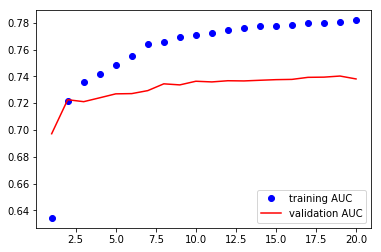

In [235]:
plt.plot(range(1,len(train_auc3)+1),train_auc3,'bo',label = 'training AUC')
plt.plot(range(1,len(val_auc3)+1),val_auc3,'r',label = 'validation AUC')
plt.legend()
plt.show()

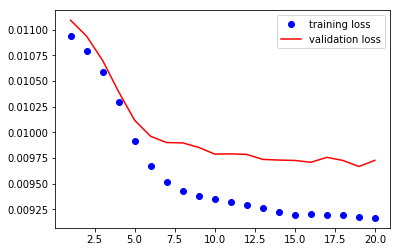

In [236]:
plt.plot(range(1,len(train_losses3)+1),train_losses3,'bo',label = 'training loss')
plt.plot(range(1,len(val_losses3)+1),val_losses3,'r',label = 'validation loss')
plt.legend()
plt.show()

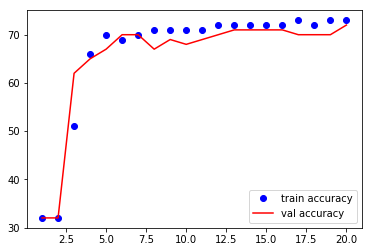

In [237]:
plt.plot(range(1,len(train_accuracy3)+1),train_accuracy3,'bo',label = 'train accuracy')
plt.plot(range(1,len(val_accuracy3)+1),val_accuracy3,'r',label = 'val accuracy')
plt.legend()

classification rate : 0.7284234752589183
Accuracy of the network on the validation set : 72 %
Confusion Matrix for the 2 classes: 
      0    1
0  473  116
1  120  160


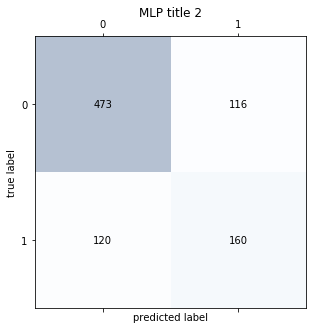

----------Model Classification-------------

             precision    recall  f1-score   support

         no       0.80      0.80      0.80       589
        yes       0.58      0.57      0.58       280

avg / total       0.73      0.73      0.73       869

 
----------Model Accuracy-------------

Accuracy: 0.728
 
----------Model ROC/AUC-------------



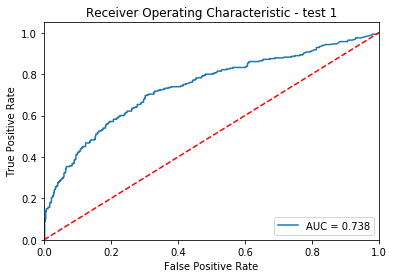

In [239]:
eval_net(net7, val_loader)

#### --- Fscore

In [240]:
class Net2(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size21, hidden_size31, num_classes):
        super(Net2, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fcM = nn.Linear(hidden_size1, hidden_size21)
        self.relu2 = nn.ReLU()
        self.fcM1 = nn.Linear(hidden_size21, hidden_size31)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size31, num_classes)
        self.lr = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fcM(out)
        out = self.relu2(out)
        out = self.fcM1(out)
        out = self.relu3(out)
        out = self.fc2(out)
        out = self.lr(out)
        return out

In [241]:
net8 = Net2(input_size, hidden_size1, hidden_size21, hidden_size31, num_classes)

if is_cuda:
    net8.cuda()

In [242]:
# Loss and Optimizer

#learning_rate = 0.001
#weights = [0.4, 1]
#class_weights=torch.FloatTensor(weights).cuda()   # might need to add is cuda
class_weights=torch.FloatTensor([0.33, 0.67])
criterion = nn.CrossEntropyLoss(weight=class_weights)

#criterion = F.cross_entropy()
optimizer8 = torch.optim.Adam(net8.parameters(), lr=learning_rate)
# -----------------------------------------------------------------------------------

In [243]:
#  C. Training final preparation

# ----- Weight initialization
def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_normal_(m.weight)
        #m.bias.data.fill_(0.01)

net8.apply(init_weights)

Net2(
  (fc1): Linear(in_features=21, out_features=15, bias=True)
  (relu1): ReLU()
  (fcM): Linear(in_features=15, out_features=8, bias=True)
  (relu2): ReLU()
  (fcM1): Linear(in_features=8, out_features=4, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=4, out_features=2, bias=True)
  (lr): Sigmoid()
)

In [244]:
# ----- Learning rate regularization
#####  NEED TO CHANGE THE patience
scheduler8 = optim.lr_scheduler.ReduceLROnPlateau(optimizer8, mode='max', patience=2, verbose=True)

In [245]:
# ----- Full training
train_losses4, train_accuracy4, train_auc4, train_fscore4 = [], [], [], []
val_losses4, val_accuracy4, val_auc4, val_fscore4= [], [], [], []


start = clock()
for epoch in range(0, epochs):
    epoch_loss4, epoch_accuracy4, epo_auc4, epo_f4 = fit(epoch, net8, train_loader, optimizer8, phase='training')
    val_epoch_loss4, val_epoch_accuracy4, val_epo_auc4, val_epo_f4 = fit(epoch, net8, val_loader, optimizer8, phase='validation')

    train_losses4.append(epoch_loss4)
    train_accuracy4.append(epoch_accuracy4)
    train_auc4.append(epo_auc4)
    train_fscore4.append(epo_f4)

    val_losses4.append(val_epoch_loss4)
    val_accuracy4.append(val_epoch_accuracy4)
    val_auc4.append(val_epo_auc4)
    val_fscore4.append(val_epo_f4)

    # Learning rate scheduler update
    scheduler4.step(val_epo_f4)

elapsed = clock() - start

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


training loss is 0.010987040190256812 and training accuracy is 2745/4054, 67
training AUC is 0.4534449050360333
F1: 0.000
________________


C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


validation loss is 0.011174056280331452 and validation accuracy is 589/869, 67
validation AUC is 0.47712527285956824
F1: 0.000
________________
Epoch    20: reducing learning rate of group 0 to 1.0000e-07.


C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


training loss is 0.010940375090468735 and training accuracy is 2745/4054, 67
training AUC is 0.554251427346895
F1: 0.000
________________


C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


validation loss is 0.011147177603494448 and validation accuracy is 589/869, 67
validation AUC is 0.5795779772010672
F1: 0.000
________________


C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


training loss is 0.010898626197660622 and training accuracy is 2745/4054, 67
training AUC is 0.6478401594120013
F1: 0.000
________________


C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


validation loss is 0.011088012277188317 and validation accuracy is 589/869, 67
validation AUC is 0.6531742663109386
F1: 0.000
________________


C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


training loss is 0.010783591776806907 and training accuracy is 2745/4054, 67
training AUC is 0.7002863738640017
F1: 0.000
________________


C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


validation loss is 0.010955482412674073 and validation accuracy is 589/869, 67
validation AUC is 0.6792384186272131
F1: 0.000
________________
Epoch    23: reducing learning rate of group 0 to 1.0000e-08.
training loss is 0.010549946524088877 and training accuracy is 2819/4054, 69
training AUC is 0.723553902435291
F1: 0.188
________________
validation loss is 0.010627034618610342 and validation accuracy is 635/869, 73
validation AUC is 0.7077825612418143
F1: 0.506
________________
training loss is 0.009948476200687163 and training accuracy is 2827/4054, 69
training AUC is 0.7382423212702866
F1: 0.569
________________
validation loss is 0.010085630197382357 and validation accuracy is 587/869, 67
validation AUC is 0.720473562939607
F1: 0.557
________________
training loss is 0.009564170607452505 and training accuracy is 2777/4054, 68
training AUC is 0.7572330273391026
F1: 0.583
________________
validation loss is 0.009930369151612557 and validation accuracy is 594/869, 68
validation AUC 

In [246]:
print(elapsed)

3.7531687926270934


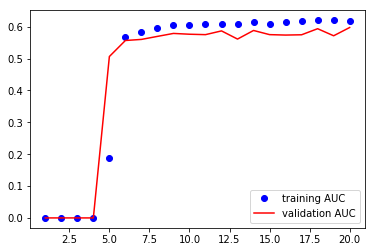

In [247]:
plt.plot(range(1,len(train_fscore4)+1),train_fscore4,'bo',label = 'training AUC')
plt.plot(range(1,len(val_fscore4)+1),val_fscore4,'r',label = 'validation AUC')
plt.legend()
plt.show()

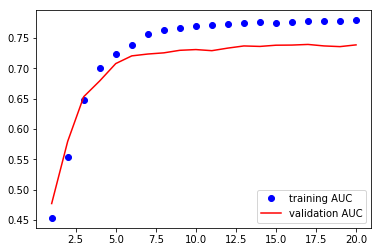

In [248]:
plt.plot(range(1,len(train_auc4)+1),train_auc4,'bo',label = 'training AUC')
plt.plot(range(1,len(val_auc4)+1),val_auc4,'r',label = 'validation AUC')
plt.legend()
plt.show()

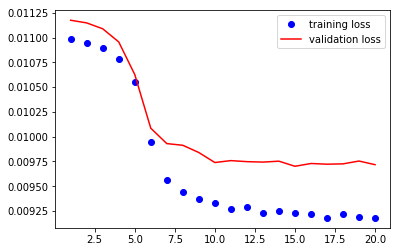

In [249]:
plt.plot(range(1,len(train_losses4)+1),train_losses4,'bo',label = 'training loss')
plt.plot(range(1,len(val_losses4)+1),val_losses4,'r',label = 'validation loss')
plt.legend()
plt.show()

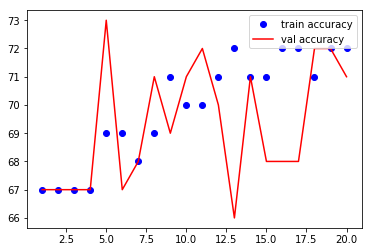

In [250]:
plt.plot(range(1,len(train_accuracy4)+1),train_accuracy4,'bo',label = 'train accuracy')
plt.plot(range(1,len(val_accuracy4)+1),val_accuracy4,'r',label = 'val accuracy')
plt.legend()

classification rate : 0.7192174913693901
Accuracy of the network on the validation set : 71 %
Confusion Matrix for the 2 classes: 
      0    1
0  444  145
1   99  181


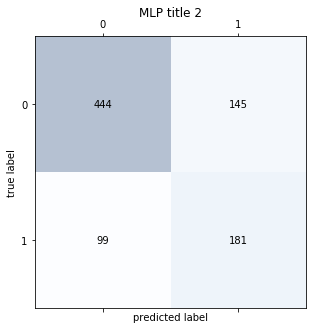

----------Model Classification-------------

             precision    recall  f1-score   support

         no       0.82      0.75      0.78       589
        yes       0.56      0.65      0.60       280

avg / total       0.73      0.72      0.72       869

 
----------Model Accuracy-------------

Accuracy: 0.719
 
----------Model ROC/AUC-------------



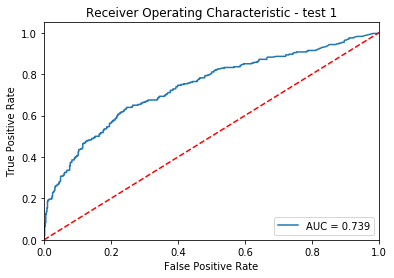

In [251]:
eval_net(net8, val_loader)